# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1096]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [1097]:
data_dir = "F:/semester 9/(NETW 908) Data Engineering/"
greentaxi_df = pd.read_csv(data_dir + "green_tripdata_2019-04.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\2133647239.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  greentaxi_df = pd.read_csv(data_dir + "green_tripdata_2019-04.csv")


In [1098]:
greentaxi_df

Vendor lpep pickup datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567859                      VeriFone Inc.  2019-04-15 10:43:23   
567860                      VeriFone Inc.  2019-04-04 21:01:33   
567861                      VeriFone Inc.  2019-04-25 08:54:39   
567862                      VeriFone Inc.  2019-04-19 23:40:34   
567863                      VeriFone Inc.  2019-04-11 18:00:42   

       lpep dropoff datetime store and fwd flag      Rate type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567859   2019-04-15 10:58:53                  N  Standard rate   
567860   2019-04-04 21:08:32                  N  Standard rate   
567861   2019-04-25 09:16:54                  N  Standard rate   
567862   2019-04-19 23:44:29                  N  Standard rate   
567863   2019-04-11 18:05:37                  N  Standard rate   

                        PU Location                      DO Location  \
0            Queens,Jackson Heights               Manhattan,Union Sq   
1                    Queens,Astoria          Queens,Elmhurst/Maspeth   
2                   Queens,Elmhurst                  Queens,Elmhurst   
3                   Queens,Elmhurst          Queens,Elmhurst/Maspeth   
4                    Queens,Astoria           Queens,Jackson Heights   
...                             ...                              ...   
567859  Manhattan,East Harlem South  Manhattan,Upper East Side South   
567860              Queens,Woodside          Queens,Elmhurst/Maspeth   
567861  Brooklyn,DUMBO/Vinegar Hill      Manhattan,Battery Park City   
567862              Queens,Steinway                  Queens,Steinway   
567863          Brooklyn,Park Slope              Brooklyn,Park Slope   

        passenger count  trip distance  fare amount  extra  mta tax  \
0                   1.0           7.72         24.0    0.5      0.5   
1                   1.0           2.73         11.0    0.5      0.5   
2                   1.0           1.57          7.0    0.5      0.5   
3                   1.0           0.88          8.0    0.5      0.5   
4                   1.0           3.10         12.0    0.5      0.5   
...                 ...            ...          ...    ...      ...   
567859              1.0           0.00         10.0    NaN      0.5   
567860              1.0           1.15          6.5    0.5      0.5   
567861              1.0           2.97         16.5    NaN      0.5   
567862              1.0           0.77          5.0    0.5      0.5   
567863              6.0           0.63          5.0    1.0      0.5   

        tip amount  tolls amount  ehail fee  improvement surcharge  \
0             0.00          6.12        NaN                    0.3   
1             0.00          0.00        NaN                    0.3   
2             0.00          0.00        NaN                    0.3   
3             0.00          0.00        NaN                    0.3   
4             0.00          0.00        NaN                    0.3   
...            ...           ...        ...                    ...   
567859        2.00          0.00        NaN                    0.3   
567860        0.00          0.00        NaN                    0.3   
567861        5.01          0.00        NaN                    0.3   
567862        1.26          0.0

In [1099]:
greentaxi_df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

# 2- EDA

### Question 1: Which trip type tends to do shorter distance rides, on average?

In [186]:
greentaxi_visualize1=greentaxi_df.copy()
print(greentaxi_visualize1['trip type'].unique())

['Street-hail' 'Dispatch' 'Unknown']


In [8]:
#We will filter the street-hail and dispatch trips only, since these are the two types we want to compare between. 
greentaxi_dist=greentaxi_visualize1[greentaxi_visualize1['trip type']!='Unknown']

#Relate each trip type with the total average distance it took for all rides  
dist=greentaxi_dist.groupby('trip type')['trip distance'].mean()
dist

trip type
Dispatch       6.306634
Street-hail    2.856897
Name: trip distance, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10124\1949285866.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


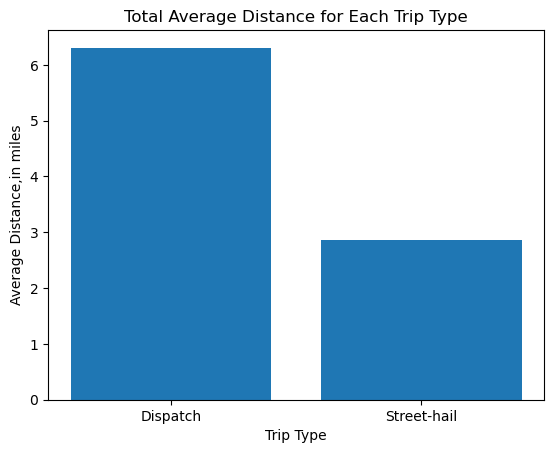

In [9]:
#Visualize the results on a bar plot 
bar_plot = plt.bar(dist.index, dist)
plt.locator_params(integer=True)
plt.title("Total Average Distance for Each Trip Type")
plt.xlabel('Trip Type')
plt.ylabel('Average Distance,in miles')
plt.show()

In [10]:
#From the graph, it is clear that street-hail trips tend to travel shorter distances 
#this makes sense because when people need to go to a place near them they need an easy way of transportation and street-hail trips are easier to find than dispatch trips. 

### Question 2: Which vendor has good server connection?

In [11]:
greentaxi_visualize2=greentaxi_df.copy()

#Get unique values of each feature
print(greentaxi_visualize2['Vendor'].unique())
print(greentaxi_visualize2['store and fwd flag'].unique())

['VeriFone Inc.' 'Creative Mobile Technologies, LLC' 'Unknown']
['N' 'Y' nan]


In [12]:
#Remove the 'Unknown' entries from the vendor feature
greentaxi_conn=greentaxi_visualize2[greentaxi_visualize2['Vendor']!='Unknown']

#The store and fwd flag column defines whether the ride record was stored in the memory(due to conncection issues) 
#before sent to the vendor or sent to the vendor drectly without being stored 
#therefore we will filter the store and fwd flag feature to have all entries ='No'

greentaxi_conn=greentaxi_conn[greentaxi_conn['store and fwd flag']=='N']

#We will relate each vendor to the store and fwd flag column by determining
#how many entries were 'no' for each vendor --> forwarded to the server directly without being stored first
conn=greentaxi_conn.groupby('Vendor')['store and fwd flag'].count()
conn

Vendor
Creative Mobile Technologies, LLC     82185
VeriFone Inc.                        430455
Name: store and fwd flag, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10124\448022464.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


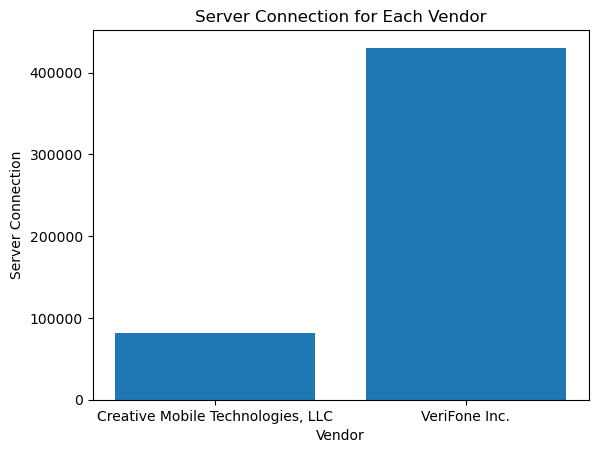

In [13]:
#Visualize the results using the bar plot
bar_plot = plt.bar(conn.index, conn)
plt.locator_params(integer=True)
plt.title("Server Connection for Each Vendor")
plt.xlabel('Vendor')
plt.ylabel('Server Connection')
plt.show()

In [14]:
#As shown in the graph, the 'VeriFone Inc.' vendor has a better server connection than the other one. 

### Question 3: What are the average number of passengers in both trip types?

In [15]:
greentaxi_visualize3=greentaxi_df.copy()

#Remove the 'Unknown' entries from the trip type feature since we need to compare between street-hail and dispatch trips only
greentaxi_visualize3=greentaxi_visualize3[greentaxi_visualize3['trip type']!= 'Unknown']

#Determine the average number of passengers in both trip types
num=greentaxi_visualize3.groupby('trip type')['passenger count'].mean()
num

trip type
Dispatch       1.179892
Street-hail    1.325611
Name: passenger count, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_10124\1438036548.py:3: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


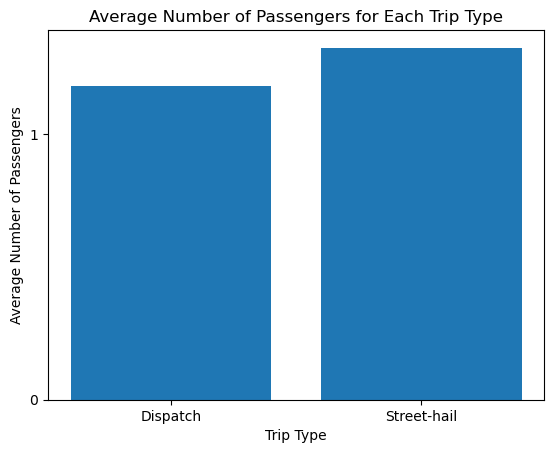

In [16]:
#Visualize using the bar plot
bar_plot = plt.bar(num.index, num)
plt.locator_params(integer=True)
plt.title("Average Number of Passengers for Each Trip Type")
plt.xlabel('Trip Type')
plt.ylabel('Average Number of Passengers')
plt.show()

In [17]:
#From the graph, the street-hail trips get more passengers. This shows the people tend to request street-hail trips more. 

### Question 4: During rush hour, which trip type passengers tend to request more in each city?

In [761]:
greentaxi_visualize4=greentaxi_df.copy()

#First, we need to split the city names from the pickup locations
def get_city(pu_location):
    #split string into multiple strings, split when a comma is encountered
    parts = pu_location.split(',')
    city = parts[0]
    return city


In [19]:
#use the method computed above to create a new column containing the cities only
greentaxi_visualize4['Pickup Location']=greentaxi_visualize4['PU Location'].apply(get_city)

#First, we need to get the entries during the rush hour only and remove the 'Unknown' trip entries
greentaxi_rush=greentaxi_visualize4[(greentaxi_visualize4['extra']==0.5) & (greentaxi_visualize4['trip type']!='Unknown')]

#then, we will divide the greentaxi_rush dataframe to two new dataframes--> 
#one for the dispatch trips and the other for the street-hail trips
greentaxi_dispatch= greentaxi_rush[greentaxi_rush['trip type']=='Dispatch']
greentaxi_streethail= greentaxi_rush[greentaxi_rush['trip type']=='Street-hail']

#Then, we will get the average number of passengers for each city using both trip types
req_dispatch=greentaxi_dispatch.groupby(['Pickup Location'])['passenger count'].sum()
req_street=greentaxi_streethail.groupby(['Pickup Location'])['passenger count'].sum()
print(req_street)
print(req_dispatch)

Pickup Location
Bronx             5387.0
Brooklyn         60194.0
Manhattan        44847.0
Queens           63276.0
Staten Island       27.0
Unknown            182.0
Name: passenger count, dtype: float64
Pickup Location
Brooklyn     124.0
Manhattan     93.0
Queens        28.0
Name: passenger count, dtype: float64


In [20]:
#convert the two series to dataframes to be able to plot
req_street_df=pd.DataFrame(req_street)
req_dispatch_df=pd.DataFrame(req_dispatch)

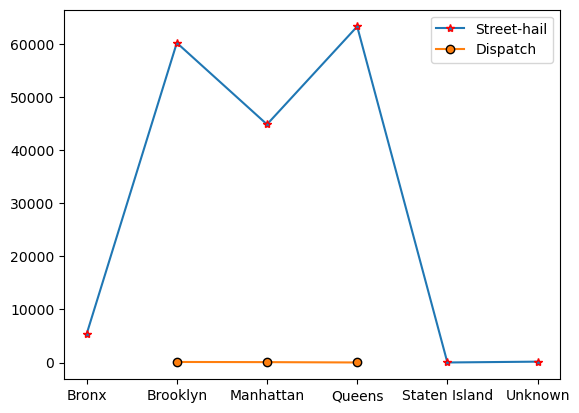

In [21]:
#Compare by using the line chart
plt.plot(req_street_df.index, req_street_df['passenger count'], label="Street-hail", marker='*', markeredgecolor='red')
plt.plot(req_dispatch_df.index, req_dispatch_df['passenger count'], label="Dispatch", marker='o', markeredgecolor='black')
plt.legend(loc=1)
plt.show()

In [22]:
#As shown, During rush hour, Brooklyn, Manhattan, and Queens are the only cities that contain dispatch rides. 
#There are no signs for the other cities showing that they use dispatch trips 
#However, even though some cities use dispatch trips during the rush hour, all cities tend have the street-hail trips requested more. 

### Question 5: On average, how much money each trip type makes, per day?

In [54]:
greentaxi_visualize5=greentaxi_df.copy()

#create a method that spilts the datetime feature to date only
def get_date(pu_datetime):
    #split string into multiple strings, split when a comma is encountered
    parts = pu_datetime.split(' ')
    date = parts[0]
    return date

#create a method that spilts the date itself to month and year only
def get_month_year(pu_month):
    #split string into multiple strings, split when a comma is encountered
    parts = pu_month.split('-')
    month = parts[1]
    year=parts[0]
    return month,year



In [24]:
#create a new column containing the date only
greentaxi_visualize5['Pickup Date']=greentaxi_visualize5['lpep pickup datetime'].apply(get_date)

#create a new column containing the month and year only
greentaxi_visualize5['Pickup Month & Year']=greentaxi_visualize5['Pickup Date'].apply(get_month_year)

#remove any entries for the pickup datetime feature not containing year 2019 and month 4. Also remove the 'Unknown' entries from the trip type feature
greentaxi_visualize5=greentaxi_visualize5[(greentaxi_visualize5['Pickup Month & Year']==('04','2019')) & (greentaxi_visualize5['trip type']!='Unknown')]

#divide the dataframe into two dataframes-->
#one for the dispatch and the other for the street-hail
greentaxi_dispatch5= greentaxi_visualize5[greentaxi_visualize5['trip type']=='Dispatch']
greentaxi_streethail5= greentaxi_visualize5[greentaxi_visualize5['trip type']=='Street-hail'] 

#get the average amount of money for each day for both trip types
money_dispatch=greentaxi_dispatch5.groupby(['Pickup Date'])['total amount'].mean()
money_street=greentaxi_streethail5.groupby(['Pickup Date'])['total amount'].mean()

print(money_dispatch)
print(money_street)


Pickup Date
2019-04-01    26.521577
2019-04-02    26.448854
2019-04-03    26.793904
2019-04-04    27.195266
2019-04-05    27.037227
2019-04-06    28.419936
2019-04-07    29.368047
2019-04-08    17.664582
2019-04-09    18.047258
2019-04-10    18.074216
2019-04-11    18.656317
2019-04-12    18.201667
2019-04-13    22.941729
2019-04-14    19.025629
2019-04-15    15.866340
2019-04-16    19.073893
2019-04-17    18.070677
2019-04-18    19.869425
2019-04-19    17.452455
2019-04-20    20.011500
2019-04-21    23.575994
2019-04-22    17.528492
2019-04-23    17.284633
2019-04-24    18.269042
2019-04-25    19.645573
2019-04-26    20.011111
2019-04-27    22.371051
2019-04-28    20.840178
2019-04-29    17.938936
2019-04-30    16.188339
Name: total amount, dtype: float64
Pickup Date
2019-04-01    15.215116
2019-04-02    15.511485
2019-04-03    16.013264
2019-04-04    16.048471
2019-04-05    15.391365
2019-04-06    15.206389
2019-04-07    15.194658
2019-04-08    15.524110
2019-04-09    15.479932
2019-

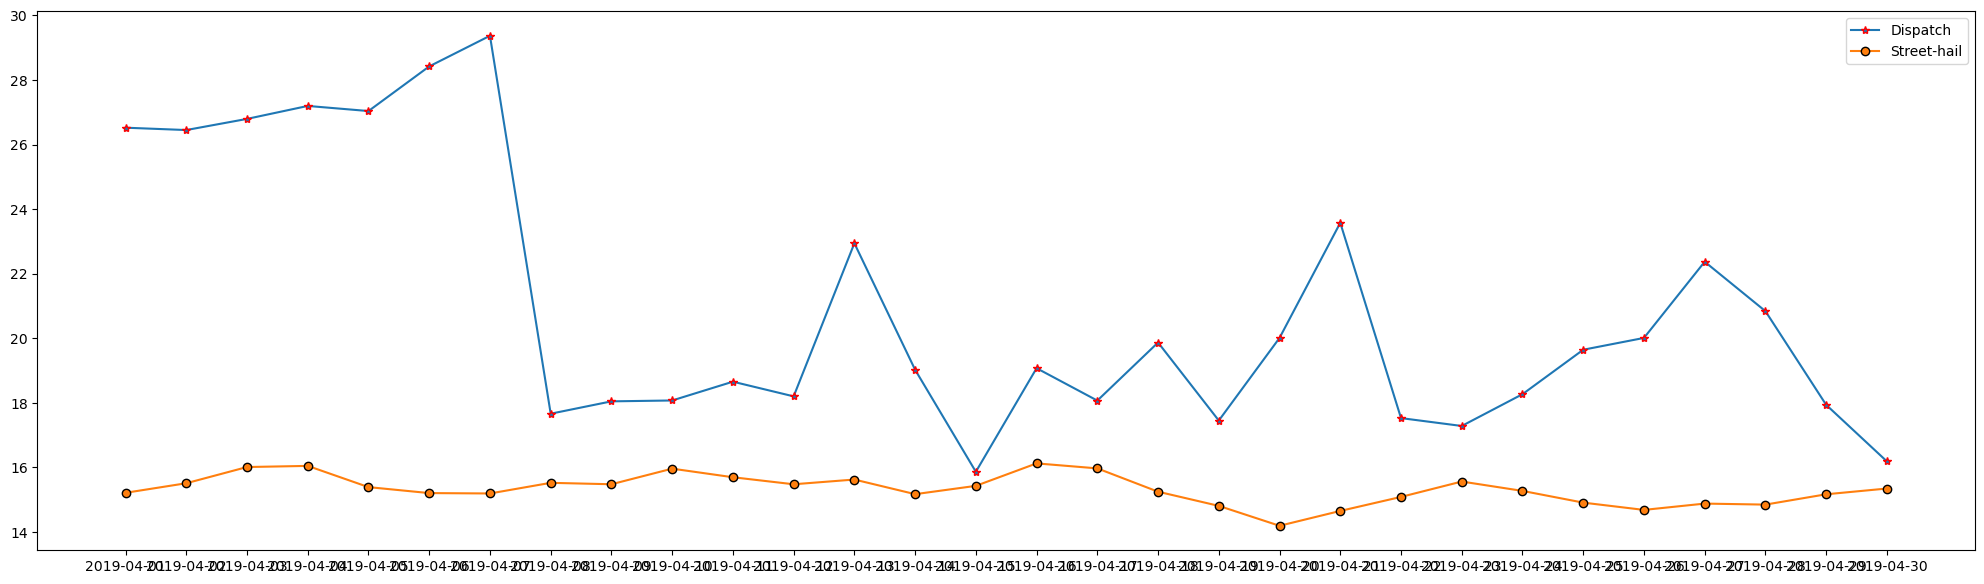

In [25]:
#Compare the average amount of money, for each day, between the two trip types using the line chart 
plt.subplots(figsize=(25,7))
plt.plot(money_dispatch.index, money_dispatch, label="Dispatch", marker='*', markeredgecolor='red')
plt.plot(money_street.index, money_street, label="Street-hail", marker='o', markeredgecolor='black')
plt.legend(loc=1)
plt.show()

# 3 - Cleaning Data

## Tidying up column names

In [1100]:
greentaxi_df_copy=greentaxi_df.copy()

In [1101]:
#make columns with lower case and remove spaces 
def rename_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = [col.replace(' ', '_') for col in df.columns]

rename_columns(greentaxi_df_copy)
greentaxi_df_copy.columns    

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

## Observe inconsistent data

In [1102]:
#First, we need to detect duplicates
greentaxi_df_copy.duplicated().sum()

16

In [1103]:
#drop duplicated rows 
greentaxi_no_duplicates = greentaxi_df_copy.drop_duplicates()
greentaxi_no_duplicates

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567851                      VeriFone Inc.  2019-04-30 23:34:00   
567852  Creative Mobile Technologies, LLC  2019-05-01 00:48:55   
567853                      VeriFone Inc.  2019-05-01 00:53:04   
567854                      VeriFone Inc.  2019-05-01 00:34:24   
567855  Creative Mobile Technologies, LLC  2019-05-01 00:42:50   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567851   2019-05-01 00:17:00                NaN        Unknown   
567852   2019-05-01 00:55:07                  N  Standard rate   
567853   2019-05-01 01:09:10                  N  Standard rate   
567854   2019-05-01 00:46:36                  N  Standard rate   
567855   2019-05-01 00:49:20                  N  Standard rate   

                     pu_location                         do_location  \
0         Queens,Jackson Heights                  Manhattan,Union Sq   
1                 Queens,Astoria             Queens,Elmhurst/Maspeth   
2                Queens,Elmhurst                     Queens,Elmhurst   
3                Queens,Elmhurst             Queens,Elmhurst/Maspeth   
4                 Queens,Astoria              Queens,Jackson Heights   
...                          ...                                 ...   
567851             Queens,Hollis               Brooklyn,Clinton Hill   
567852  Manhattan,Central Harlem      Manhattan,Central Harlem North   
567853      Brooklyn,Boerum Hill  Brooklyn,Prospect-Lefferts Gardens   
567854   Brooklyn,Bushwick South                    Queens,Ridgewood   
567855       Brooklyn,Park Slope               Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                   1.0           7.72        24.00   0.50      0.5   
1                   1.0           2.73        11.00   0.50      0.5   
2                   1.0           1.57         7.00   0.50      0.5   
3                   1.0           0.88         8.00   0.50      0.5   
4                   1.0           3.10        12.00   0.50      0.5   
...                 ...            ...          ...    ...      ...   
567851              NaN          15.10        59.45   2.75      0.5   
567852              1.0           1.50         7.50    NaN      0.5   
567853              5.0           3.56        14.50   0.50      0.5   
567854              1.0           2.23        10.00   0.50      0.5   
567855              1.0           1.70         7.50   0.50      0.5   

        tip_amount  tolls_amount  ehail_fee  improvement_surcharge  \
0              0.0          6.12        NaN                    0.3   
1              0.0          0.00        NaN                    0.3   
2              0.0          0.00        NaN                    0.3   
3              0.0          0.00        NaN                    0.3   
4              0.0          0.00        NaN                    0.3   
...            ...           ...        ...                    ...   
567851         0.0          0.00        NaN                    0.0   
567852         0.0          0.00        NaN                    0.3   
567853         4.2          0.00        NaN                    0.3   
567854         0.0          0.0

In [1104]:
#to detect inconsistent data, we should deal with missing data first
greentaxi_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567848 entries, 0 to 567855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor                 567848 non-null  object 
 1   lpep_pickup_datetime   567848 non-null  object 
 2   lpep_dropoff_datetime  567848 non-null  object 
 3   store_and_fwd_flag     514033 non-null  object 
 4   rate_type              567848 non-null  object 
 5   pu_location            567848 non-null  object 
 6   do_location            567848 non-null  object 
 7   passenger_count        513011 non-null  float64
 8   trip_distance          567848 non-null  float64
 9   fare_amount            567848 non-null  float64
 10  extra                  298056 non-null  float64
 11  mta_tax                567848 non-null  float64
 12  tip_amount             567848 non-null  float64
 13  tolls_amount           567848 non-null  float64
 14  ehail_fee              320 non-null 

#### After dealing with the missing data, we will check if there are inconsistent data 

In [1142]:
greentaxi_no_duplicates_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567848 entries, 0 to 567855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor                 567848 non-null  object 
 1   lpep_pickup_datetime   567848 non-null  object 
 2   lpep_dropoff_datetime  567848 non-null  object 
 3   store_and_fwd_flag     567848 non-null  object 
 4   rate_type              567848 non-null  object 
 5   pu_location            567848 non-null  object 
 6   do_location            567848 non-null  object 
 7   passenger_count        567848 non-null  float64
 8   trip_distance          567848 non-null  float64
 9   fare_amount            567848 non-null  float64
 10  extra                  567848 non-null  float64
 11  mta_tax                567848 non-null  float64
 12  tip_amount             567848 non-null  float64
 13  tolls_amount           567848 non-null  float64
 14  improvement_surcharge  567848 non-nu

In [1143]:
#we can see the dtype of the 'passenger_count' is float. However, the passenger count should be integer
#as the number of passengers should be discrete and not continuous.
#therefore, we will convert the dtype of the passenger count to integer.
greentaxi_no_duplicates_copy.passenger_count = greentaxi_no_duplicates_copy.passenger_count.astype(int)
greentaxi_no_duplicates_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567848 entries, 0 to 567855
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor                 567848 non-null  object 
 1   lpep_pickup_datetime   567848 non-null  object 
 2   lpep_dropoff_datetime  567848 non-null  object 
 3   store_and_fwd_flag     567848 non-null  object 
 4   rate_type              567848 non-null  object 
 5   pu_location            567848 non-null  object 
 6   do_location            567848 non-null  object 
 7   passenger_count        567848 non-null  int32  
 8   trip_distance          567848 non-null  float64
 9   fare_amount            567848 non-null  float64
 10  extra                  567848 non-null  float64
 11  mta_tax                567848 non-null  float64
 12  tip_amount             567848 non-null  float64
 13  tolls_amount           567848 non-null  float64
 14  improvement_surcharge  567848 non-nu

## Observe and Handling Inconsistent Data

In [1144]:
greentaxi_irr= greentaxi_no_duplicates_copy.copy()
greentaxi_irr

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567851                      VeriFone Inc.  2019-04-30 23:34:00   
567852  Creative Mobile Technologies, LLC  2019-05-01 00:48:55   
567853                      VeriFone Inc.  2019-05-01 00:53:04   
567854                      VeriFone Inc.  2019-05-01 00:34:24   
567855  Creative Mobile Technologies, LLC  2019-05-01 00:42:50   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567851   2019-05-01 00:17:00            Missing        Unknown   
567852   2019-05-01 00:55:07                  N  Standard rate   
567853   2019-05-01 01:09:10                  N  Standard rate   
567854   2019-05-01 00:46:36                  N  Standard rate   
567855   2019-05-01 00:49:20                  N  Standard rate   

                     pu_location                         do_location  \
0         Queens,Jackson Heights                  Manhattan,Union Sq   
1                 Queens,Astoria             Queens,Elmhurst/Maspeth   
2                Queens,Elmhurst                     Queens,Elmhurst   
3                Queens,Elmhurst             Queens,Elmhurst/Maspeth   
4                 Queens,Astoria              Queens,Jackson Heights   
...                          ...                                 ...   
567851             Queens,Hollis               Brooklyn,Clinton Hill   
567852  Manhattan,Central Harlem      Manhattan,Central Harlem North   
567853      Brooklyn,Boerum Hill  Brooklyn,Prospect-Lefferts Gardens   
567854   Brooklyn,Bushwick South                    Queens,Ridgewood   
567855       Brooklyn,Park Slope               Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                     1           7.72        24.00   0.50      0.5   
1                     1           2.73        11.00   0.50      0.5   
2                     1           1.57         7.00   0.50      0.5   
3                     1           0.88         8.00   0.50      0.5   
4                     1           3.10        12.00   0.50      0.5   
...                 ...            ...          ...    ...      ...   
567851                0          15.10        59.45   2.75      0.5   
567852                1           1.50         7.50   0.00      0.5   
567853                5           3.56        14.50   0.50      0.5   
567854                1           2.23        10.00   0.50      0.5   
567855                1           1.70         7.50   0.50      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0              0.0          6.12                    0.3         34.17   
1              0.0          0.00                    0.3         12.30   
2              0.0          0.00                    0.3          8.30   
3              0.0          0.00                    0.3          9.30   
4              0.0          0.00                    0.3         13.30   
...            ...           ...                    ...           ...   
567851         0.0          0.00                    0.0         62.70   
567852         0.0          0.00                    0.3          8.30   
567853         4.2          0.00                    0.3         20.00   
5

In [1145]:
#When the trip distance and the fare amount values are equal '0' and the trip duration is equal '0' or less than 1 minute,
#this is considered irrelevant data as it indicates that the trip or the ride didn't happen at all--> due to a very very small duration and no amount paid at all. 
#So,first we need to check if there are entries with this condition. 


#take a subset of the dataset containing entries with both 'trip_distance' and 'fare_amount' = 0
greentaxi_trip=greentaxi_irr[(greentaxi_irr.trip_distance==0) & (greentaxi_irr.fare_amount==0)]

#size before dropping
print(greentaxi_trip.shape[0])
print(greentaxi_irr.shape[0])


#function to get the entries we want to drop--> those with trip duration less than 1 minute.
def drop_trip_entry(df,col1,col2):
    for index in df.index:
        #get the difference between the dropoff and pickup times for each entry 
        #we want to get the entries that will be dropped later on in the original data (greentaxi_irr)
        #so, if greater than 1 minute, we will drop it --> correct data 
        if ((df[col2][index])- (df[col1][index])).total_seconds() > 60:
            df=df.drop(index)
    return df

#convert the type of the pickup and dropoff datetime columns to type 'datetime'
greentaxi_trip['pu_datetime'] = pd.to_datetime(greentaxi_trip['lpep_pickup_datetime'])
greentaxi_trip['do_datetime'] = pd.to_datetime(greentaxi_trip['lpep_dropoff_datetime'])
greentaxi_trip=drop_trip_entry(greentaxi_trip,'pu_datetime','do_datetime') 

#number of entries that will be dropped from the greentaxi_irr dataset 
print(greentaxi_trip.shape[0])

#drop the entries in greentaxi_trip from the greentaxi_irr dataset
greentaxi_irr = greentaxi_irr.drop(greentaxi_trip.index, errors='ignore')

#size after dropping
greentaxi_irr.shape[0]


274
567848
169


C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\851148549.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greentaxi_trip['pu_datetime'] = pd.to_datetime(greentaxi_trip['lpep_pickup_datetime'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\851148549.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  greentaxi_trip['do_datetime'] = pd.to_datetime(greentaxi_trip['lpep_dropoff_datetime'])


567679

In [1146]:
#Other type of inconsistent data we can encounter is if the pickup and drop locations are both 'Unknown' is the same entry 
#This indicates that we don't know the location of the trip. Therefore, the entry is useless to us and we can drop it.
#First, we will split the pickup and dropoff locations
greentaxi_irr['Pickup City']=greentaxi_irr['pu_location'].apply(get_city)
greentaxi_irr['Dropoff City']=greentaxi_irr['do_location'].apply(get_city)

#size before dropping
print(greentaxi_irr.shape[0])

def drop_loc(df,col1,col2):
    for index in df.index:
        #get the entries that will be dropped later on in the original data (greentaxi_irr)
        if (((df[col1][index])=='Unknown') & ((df[col2][index])=='Unknown')):
            df=df.drop(index)
    return df

greentaxi_irr=drop_loc(greentaxi_irr,'Pickup City','Dropoff City') 

#size after dropping
greentaxi_irr.shape[0]

567679


566102

In [1147]:
greentaxi_irr

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567851                      VeriFone Inc.  2019-04-30 23:34:00   
567852  Creative Mobile Technologies, LLC  2019-05-01 00:48:55   
567853                      VeriFone Inc.  2019-05-01 00:53:04   
567854                      VeriFone Inc.  2019-05-01 00:34:24   
567855  Creative Mobile Technologies, LLC  2019-05-01 00:42:50   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567851   2019-05-01 00:17:00            Missing        Unknown   
567852   2019-05-01 00:55:07                  N  Standard rate   
567853   2019-05-01 01:09:10                  N  Standard rate   
567854   2019-05-01 00:46:36                  N  Standard rate   
567855   2019-05-01 00:49:20                  N  Standard rate   

                     pu_location                         do_location  \
0         Queens,Jackson Heights                  Manhattan,Union Sq   
1                 Queens,Astoria             Queens,Elmhurst/Maspeth   
2                Queens,Elmhurst                     Queens,Elmhurst   
3                Queens,Elmhurst             Queens,Elmhurst/Maspeth   
4                 Queens,Astoria              Queens,Jackson Heights   
...                          ...                                 ...   
567851             Queens,Hollis               Brooklyn,Clinton Hill   
567852  Manhattan,Central Harlem      Manhattan,Central Harlem North   
567853      Brooklyn,Boerum Hill  Brooklyn,Prospect-Lefferts Gardens   
567854   Brooklyn,Bushwick South                    Queens,Ridgewood   
567855       Brooklyn,Park Slope               Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  ...  tip_amount  \
0                     1           7.72        24.00  ...         0.0   
1                     1           2.73        11.00  ...         0.0   
2                     1           1.57         7.00  ...         0.0   
3                     1           0.88         8.00  ...         0.0   
4                     1           3.10        12.00  ...         0.0   
...                 ...            ...          ...  ...         ...   
567851                0          15.10        59.45  ...         0.0   
567852                1           1.50         7.50  ...         0.0   
567853                5           3.56        14.50  ...         4.2   
567854                1           2.23        10.00  ...         0.0   
567855                1           1.70         7.50  ...         1.0   

        tolls_amount  improvement_surcharge  total_amount  payment_type  \
0               6.12                    0.3         34.17          Cash   
1               0.00                    0.3         12.30          Cash   
2               0.00                    0.3          8.30          Cash   
3               0.00                    0.3          9.30          Cash   
4               0.00                    0.3         13.30          Cash   
...              ...                    ...           ...           ...   
567851          0.00                    0.0         62.70       Unknown   
567852          0.00                    0.3          8.30          Cash   
567853          0.00                    0.3 

In [1148]:
#Another inconsistent data might be that some of the entries in the pickup datetime could be recorded in another year or month other than 04-2019 
#convert type to datetime type
greentaxi_irr['datetime'] = pd.to_datetime(greentaxi_irr['lpep_pickup_datetime'])

#size before dropping
print(greentaxi_irr.shape[0])

def drop_date(df,col,month,year):
    for index in df.index:
        #get the entries that will be dropped later on in the original data (greentaxi_irr)
        m = (df[col][index]).month
        y = (df[col][index]).year
        if ((m != month) | (y!=year)):
            df=df.drop(index)
    return df

greentaxi_irr=drop_date(greentaxi_irr,'datetime',4,2019)

#size after dropping
greentaxi_irr.shape[0]

566102


566065

In [1149]:
greentaxi_irr

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567847                      VeriFone Inc.  2019-04-30 23:36:00   
567848                      VeriFone Inc.  2019-04-30 23:39:00   
567849                      VeriFone Inc.  2019-04-30 23:07:00   
567850                      VeriFone Inc.  2019-04-30 23:29:00   
567851                      VeriFone Inc.  2019-04-30 23:34:00   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567847   2019-04-30 23:58:00            Missing        Unknown   
567848   2019-04-30 23:52:00            Missing        Unknown   
567849   2019-04-30 23:16:00            Missing        Unknown   
567850   2019-05-01 00:02:00            Missing        Unknown   
567851   2019-05-01 00:17:00            Missing        Unknown   

                      pu_location                  do_location  \
0          Queens,Jackson Heights           Manhattan,Union Sq   
1                  Queens,Astoria      Queens,Elmhurst/Maspeth   
2                 Queens,Elmhurst              Queens,Elmhurst   
3                 Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4                  Queens,Astoria       Queens,Jackson Heights   
...                           ...                          ...   
567847  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848           Bronx,Highbridge  Manhattan,East Harlem South   
567849              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  ...  tolls_amount  \
0                     1           7.72        24.00  ...          6.12   
1                     1           2.73        11.00  ...          0.00   
2                     1           1.57         7.00  ...          0.00   
3                     1           0.88         8.00  ...          0.00   
4                     1           3.10        12.00  ...          0.00   
...                 ...            ...          ...  ...           ...   
567847                0          13.44        54.05  ...          0.00   
567848                0           4.94        32.75  ...          0.00   
567849                0           2.66        22.25  ...          0.00   
567850                0           8.12        43.20  ...          0.00   
567851                0          15.10        59.45  ...          0.00   

        improvement_surcharge  total_amount  payment_type    trip_type  \
0                         0.3         34.17          Cash  Street-hail   
1                         0.3         12.30          Cash  Street-hail   
2                         0.3          8.30          Cash  Street-hail   
3                         0.3          9.30          Cash  Street-hail   
4                         0.3         13.30          Cash  Street-hail   
...                       ...           ...           ...          ...   
567847                    0.0         57.30       Unknown      Unknown   
567848                    0.0         36.00       Unknown      Unknown   
567849                    0.0         25.50       Unknown      Unknown   
567850                    0

In [1150]:
greentaxi_semi=greentaxi_irr.copy()

# Observing and Handling Missing Data

In [1118]:
greentaxi_no_duplicates_copy=greentaxi_no_duplicates.copy()

In [1119]:
def get_null_count(df,col1,col2):
    return df[col1].isnull().groupby(df[col2]).sum()

def check_null(df,col):
    return df.isnull().sum()[col]

### observing and dealing with the 'ehail_fee' feature:

In [1120]:
#the null percentage of the ehail feature is around 100%(99.94%)--> meaning the data is most likely to not exist.  
#therefore, we will drop the whole column as it won't be affecting the dataset in general or other features. 
def drop_column(df,col):
    df_copy=df.drop(columns=col)
    return df_copy
greentaxi_no_duplicates_copy = drop_column(greentaxi_no_duplicates_copy,'ehail_fee')
#check features to make sure the column was removed 
greentaxi_no_duplicates_copy.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

### Observing and dealing with the 'store and fwd flag' feature 

In [1121]:
get_null_count(greentaxi_no_duplicates_copy,'store_and_fwd_flag','trip_type')

trip_type
Dispatch           0
Street-hail        0
Unknown        53815
Name: store_and_fwd_flag, dtype: int64

As we can see, most of the missing values in the 'store and fwd flag' feature are for the 'unknown' trip types. 'Unknown' trip types infer that there was not enough information about the ride, including the trip type.

Therefore, we can say that data is NMAR since there is a strong relation between the two features, where the 'store and fwd flag' had missing values because the trip type was 'Unknown'. 

In [1122]:
#we can't impute with the mode because the data is not missing at random, and more than 5% of data is missing. 

#Therefore, since the data is MNAR and null percentage is 9%(high with respect to the size of the dataset),
#we will impute the missing values of the 'store and fwd flag' feature using Missing Category Imputation to indicate that this information is missing

def impute_missing(df,col,lookup_table):
    df[col]=df[col].fillna('Missing')
    map_value= pd.DataFrame({
        'Column Name': [col],
        'Original Value': 'NaN',
        'Imputed Value' : 'Missing'
    })
    return pd.concat([lookup_table,map_value])

lookup_table_df=pd.DataFrame()
lookup_table_df= impute_missing(greentaxi_no_duplicates_copy,'store_and_fwd_flag',lookup_table_df)
check_null(greentaxi_no_duplicates_copy,'store_and_fwd_flag')
    

0

In [1123]:
lookup_table_df

Column Name Original Value Imputed Value
0  store_and_fwd_flag            NaN       Missing

### Observing and dealing with the 'congestion_surcharge' feature

In [1124]:
get_null_count(greentaxi_no_duplicates_copy,'congestion_surcharge','trip_type')

trip_type
Dispatch           0
Street-hail        0
Unknown        53815
Name: congestion_surcharge, dtype: int64

The 'congestion surcharge' feature have the same null reason as the 'store and fwd flag' feature. Moreover, it has the same null percentage as the 'store and fwd flag' feature. Also, if we get the null entries of the 'congestion surcharge', we will find that they are the same ones as the 'store and fwd flag' 


In [1125]:
get_null_count(greentaxi_no_duplicates_copy, 'congestion_surcharge', 'store_and_fwd_flag') 

store_and_fwd_flag
Missing    53815
N              0
Y              0
Name: congestion_surcharge, dtype: int64

So, we can infer that all missing values of the 'congestion surcharge' feature are introduced in the 'Unknown' trip types only(same as 'store and fwd flag'). This indicates that there was not enough information for this ride, in general. 

Therefore, we can say that the data is NMAR as the missing values were introduced because the trip type was unknown. 

In [1126]:
greentaxi_no_duplicates_copy.congestion_surcharge.unique()

array([ 2.75,  0.  ,  2.5 , -2.75,  0.75,  0.3 ,   nan])

In [1127]:
#We can impute the NaN values using Arbitrary Value Imputation using by a value equals -1 --> 
#as it is not one of the unique values the congestion surcharge feature. This value will indicate that this entry contains 
#no value in this feature. 

def impute_with_arbitrary(df,col,arbit_value,lookup_table):
    df[col]=df[col].fillna(value=arbit_value)
    map_value=pd.DataFrame({
        'Column Name': [col],
        'Original Value': 'NaN',
        'Imputed Value': arbit_value})
    return pd.concat([lookup_table,map_value])
   
lookup_table_df= impute_with_arbitrary(greentaxi_no_duplicates_copy,'congestion_surcharge',-1,lookup_table_df)
check_null(greentaxi_no_duplicates_copy,'congestion_surcharge')

0

In [1128]:
lookup_table_df

Column Name Original Value Imputed Value
0    store_and_fwd_flag            NaN       Missing
0  congestion_surcharge            NaN            -1

### observing and dealing with the 'extra' feature:

Whenever there is a rush hour, the 'extra' fees are either $1 or $0.5. Else, the 'extra' fees will be either equal 0 or any other value.
During the rush hour, it is most likely that the driver might forget or not have the time to record the 'extra' fees paid due to the crowd and instead record the total amount only. 
We can also assume that during the normal hours, the driver might take the easier path and enter the total amount only, assuming that the value in the 'extra' fees will be entered automatically by subtracting the other types of fees from the tota amount--> which is not true and it got entered as a NaN value instead.
To validate our reason, we will first get an approximated range of the rush hours.

In [1129]:
#split the time to get the hours only
def get_time(pu_time):
    #split date and time
    parts = pu_time.split(' ')
    #get hours only
    parts2=parts[1].split(':')
    hour= parts2[0]
    return hour

#get an approximated range of the rush hours for a specific col feature
def get_rush(df,col):
    #get the hours only from the 'lpep_pickup_datetime' feature
    df['pickup_time']=df['lpep_pickup_datetime'].apply(get_time)  
    
    #count how many times this specific fee value was paid for each hour and sort from largest to smallest value
    rush=df[col].groupby(df.pickup_time).count().sort_values(ascending=False)
    return rush

#take two subsets of the dataset with 'extra' feature once = 0.5 and other equal = 1
df_extra05= greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.extra==0.5]
df_extra1= greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.extra==1]

#get rush hour when '0.5' was paid
rush05 = get_rush(df_extra05,'extra')

#get rush hour when '1' was paid
rush1  = get_rush(df_extra1,'extra')


print(rush05)
print(rush1)
 

pickup_time
20    26233
21    23368
22    21550
23    18054
00    13042
01     8835
02     6054
03     4869
04     4334
05     3211
19     1053
06      177
18      174
17      162
16      156
15      144
14      127
13      100
10       73
12       73
11       67
09       63
07       44
08       40
Name: extra, dtype: int64
pickup_time
18    27270
17    25014
19    23222
16    22084
15      775
20      733
14      150
13      108
12       71
10       64
11       59
22       55
21       53
09       51
01       51
23       50
00       44
08       33
07       28
03       28
04       24
02       21
05        9
06        7
Name: extra, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\3356547397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_time']=df['lpep_pickup_datetime'].apply(get_time)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\3356547397.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_time']=df['lpep_pickup_datetime'].apply(get_time)


As shown, passengers pay an extra fee of '0.5' from 8 PM to 11 PM and an extra fee of '1' from 4 PM to 7 PM.
Otherwise, from 12 AM to 3 PM, other value is paid. 

Now, to validate our justification, we will get the percentage of the null values of the extra feature with respect to each hour. 

In [1130]:
def get_null_with_hour(df,col):
    df['pickup_time']=df['lpep_pickup_datetime'].apply(get_time)
    return df[col].isnull().groupby(df.pickup_time).mean()*100
    
get_null_with_hour(greentaxi_no_duplicates_copy,'extra')

pickup_time
00     2.392965
01     2.903946
02     4.279211
03     5.517874
04     8.713920
05    15.435356
06    71.150634
07    79.296298
08    82.924837
09    83.614773
10    83.166248
11    83.816138
12    84.674723
13    84.808082
14    85.690161
15    85.403782
16    26.243985
17    23.269387
18    22.610095
19    22.733901
20     3.398873
21     2.677141
22     2.339357
23     2.450577
Name: extra, dtype: float64

As shown, a higher null percentage occurs from 12 AM to 3 PM (normal hours) than from 4 PM to 11 PM (rush hours). Therefore, we can say that our justification is correct and most of the values of the extra feature were missing due to an assumption from the driver that any other value of the 'extra' fee will be calculated and entered automatically as long as he entered the total amount.

Moreover, we can say that the data is most likely to be MNAR, since there is a strong relation between the extra fees and the hour a passenger orders a ride. 

Now, we can deal with the missing values by mapping the missing value to the pickup hour.
If the hour is anything from 4 PM to 7 PM, we will impute it with '0.5'. If the hour is from 8 PM to 11 PM, we will impute it with '1'. Otherwise, we will impute it by calculating the fee using the total amount and other fee types.  

In [1131]:
greentaxi_no_duplicates_copy

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567851                      VeriFone Inc.  2019-04-30 23:34:00   
567852  Creative Mobile Technologies, LLC  2019-05-01 00:48:55   
567853                      VeriFone Inc.  2019-05-01 00:53:04   
567854                      VeriFone Inc.  2019-05-01 00:34:24   
567855  Creative Mobile Technologies, LLC  2019-05-01 00:42:50   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567851   2019-05-01 00:17:00            Missing        Unknown   
567852   2019-05-01 00:55:07                  N  Standard rate   
567853   2019-05-01 01:09:10                  N  Standard rate   
567854   2019-05-01 00:46:36                  N  Standard rate   
567855   2019-05-01 00:49:20                  N  Standard rate   

                     pu_location                         do_location  \
0         Queens,Jackson Heights                  Manhattan,Union Sq   
1                 Queens,Astoria             Queens,Elmhurst/Maspeth   
2                Queens,Elmhurst                     Queens,Elmhurst   
3                Queens,Elmhurst             Queens,Elmhurst/Maspeth   
4                 Queens,Astoria              Queens,Jackson Heights   
...                          ...                                 ...   
567851             Queens,Hollis               Brooklyn,Clinton Hill   
567852  Manhattan,Central Harlem      Manhattan,Central Harlem North   
567853      Brooklyn,Boerum Hill  Brooklyn,Prospect-Lefferts Gardens   
567854   Brooklyn,Bushwick South                    Queens,Ridgewood   
567855       Brooklyn,Park Slope               Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                   1.0           7.72        24.00   0.50      0.5   
1                   1.0           2.73        11.00   0.50      0.5   
2                   1.0           1.57         7.00   0.50      0.5   
3                   1.0           0.88         8.00   0.50      0.5   
4                   1.0           3.10        12.00   0.50      0.5   
...                 ...            ...          ...    ...      ...   
567851              NaN          15.10        59.45   2.75      0.5   
567852              1.0           1.50         7.50    NaN      0.5   
567853              5.0           3.56        14.50   0.50      0.5   
567854              1.0           2.23        10.00   0.50      0.5   
567855              1.0           1.70         7.50   0.50      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0              0.0          6.12                    0.3         34.17   
1              0.0          0.00                    0.3         12.30   
2              0.0          0.00                    0.3          8.30   
3              0.0          0.00                    0.3          9.30   
4              0.0          0.00                    0.3         13.30   
...            ...           ...                    ...           ...   
567851         0.0          0.00                    0.0         62.70   
567852         0.0          0.00                    0.3          8.30   
567853         4.2          0.00                    0.3         20.00   
5

In [1132]:
def calculate_fee(df,col1,col2,col3,col4,col5,col6,col7):
    df[col1]=df[col1].fillna(value=(df[col2] - (df[col3] + df[col4] + df[col5] + df[col6] + df[col7])))
    
def replace_column_NaN_value(df, col1, new_value):
    for index in df.index: 
        if (df[col1].isnull()[index]): 
                df.at[index,col1]= new_value
                

# take a subset of the dataset for pickup times from 8 PM to 11 PM 
greentaxi_extra_05=greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int)>=20) & (greentaxi_no_duplicates_copy.pickup_time.astype(int)<=23)]
replace_column_NaN_value(greentaxi_extra_05, 'extra', 0.50)

# take a subset of the dataset for pickup times from 4 PM to 7 PM 
greentaxi_extra_1=greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int)>=16) & (greentaxi_no_duplicates_copy.pickup_time.astype(int)<=19)]
replace_column_NaN_value(greentaxi_extra_1, 'extra', 1.0)


# take a subset of the dataset for pickup times from 12 AM to 3 PM 
greentaxi_normalhours=greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int)>=0) & (greentaxi_no_duplicates_copy.pickup_time.astype(int)<=15)]
calculate_fee(greentaxi_normalhours,'extra','total_amount','fare_amount','mta_tax',
             'tolls_amount','improvement_surcharge','congestion_surcharge')


greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int) >= 20) & 
                             (greentaxi_no_duplicates_copy.pickup_time.astype(int) <= 23)]=greentaxi_extra_05

greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int) >= 16) & 
                             (greentaxi_no_duplicates_copy.pickup_time.astype(int) <= 19)]=greentaxi_extra_1

greentaxi_no_duplicates_copy[(greentaxi_no_duplicates_copy.pickup_time.astype(int) >= 0) & 
                             (greentaxi_no_duplicates_copy.pickup_time.astype(int) <= 15)]=greentaxi_normalhours

check_null(greentaxi_no_duplicates_copy,'extra')       

C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\1451714244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1]=df[col1].fillna(value=(df[col2] - (df[col3] + df[col4] + df[col5] + df[col6] + df[col7])))


0

### observing and dealing with the 'payment_type' feature

In [1133]:
get_null_count(greentaxi_no_duplicates_copy,'payment_type','trip_type')

trip_type
Dispatch         326
Street-hail    12806
Unknown            0
Name: payment_type, dtype: int64

Normally, passengers in street-hail trips tend to pay in cash more than using credit cards. Assuming that in cases where the passenger didn't have enough cash on hand to pay the driver for a street-hail trip and instead paid using credit card, the driver could have forgotten to record the payment type --> hence resulting in more null values for the street-hail trips as shown above.
So, we can say that the data is MAR since there is a relation between the payment type and the trip type.

In [1134]:
greentaxi_no_duplicates_copy.payment_type.mode()

0    Credit card
Name: payment_type, dtype: object

In [1135]:
#to validate our reason more, as expected, the credit card payment type is the most occuring one. Therefore, we will impute the missing values 
#in the payment type with its mode--> credit card, for both street-hail and dispatch trip types. 

def impute_with_mode(df,col):
    mode=df[col].mode()[0]
    df[col]=df[col].fillna(mode)
    
impute_with_mode(greentaxi_no_duplicates_copy,'payment_type')
check_null(greentaxi_no_duplicates_copy,'payment_type')

0

### observing and dealing with 'passenger_count' feature

 The null percentage of the 'passenger count' is around 9%, which can indicate that the data was lost or not recorded.
We can check whether there is a relation between the 'passenger count' and the 'trip type'. 

In [1136]:
get_null_count(greentaxi_no_duplicates_copy,'passenger_count','trip_type')

trip_type
Dispatch         104
Street-hail      918
Unknown        53815
Name: passenger_count, dtype: int64

As we can see, since some trip types were recorded as 'Unknown', we can infer that there was not enough information for this ride, resulting in having large number of missing values of the passenger count. 

In 'street-hail' trips, passengers often hail a cab directly on the street. Assuming it is possible that given the urgency of starting the trip immediately, the driver may sometimes overlook recording the 'passenger count', leading to having some missing values as well. 

On the other hand, 'dispatch' trips, where cabs are ordered via phone or application, tend to follow a more organized data entry process. So, drivers may be prompted to provide the 'passenger count', resulting in a lower likelihood of having missing values.


Therefore, we can say the data is NMAR as there is a strong relation between the passenger count and the trip type. 

In [1137]:
greentaxi_no_duplicates_copy.passenger_count.unique() 

array([  1.,   3.,   2.,   4.,   5.,   6.,  nan,   8., 333.,   7.,   9.])

For the street-hail and dispatch trips, we can impute either by the mean or median. First, we will check the distribution to see which will suit the dataset more. 
If the distribution is normal--> we can use either mean or median
If the distribution is skewed--> we will use the median

For the 'unknown' trip types, we will use Arbitrary Value Imputation to indicate that this record has unknown data. 
Our arbitrary value will be = 0 (since it is not one of the unique values of the passenger count feature). This '0' value does indicate that no passenger was there in the ride, but indicates that this data is missing or unknown for us. 

C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\1937509048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(greentaxi_no_duplicates_copy.passenger_count)


<Axes: xlabel='passenger_count', ylabel='Density'>

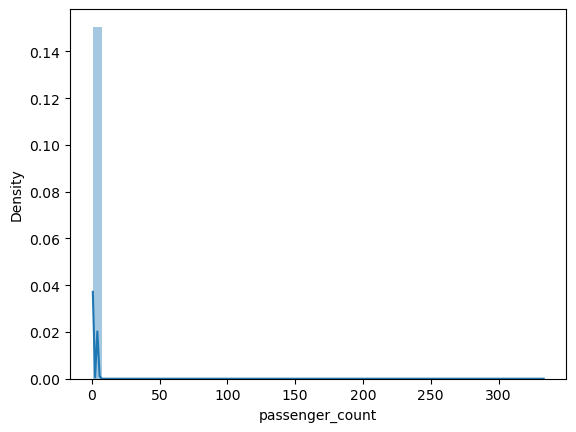

In [1138]:
sns.distplot(greentaxi_no_duplicates_copy.passenger_count)

In [1139]:
#The distribution is skewed, so we will impute using the median for street-hail and dispatch trip types
def impute_with_median(df,col):
    df[col]=df[col].fillna(value=df[col].median())
      

#take subset of the dataset for street-hail trips and impute its NaN values with the median 
greentaxi_street=greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type =='Street-hail']
impute_with_median(greentaxi_street,'passenger_count')

#take subset of the dataset for dispatch trips and impute its NaN values with the median 
greentaxi_dispatch=greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type =='Dispatch']
impute_with_median(greentaxi_dispatch,'passenger_count')

#take subset of the dataset for unknown trips and impute its NaN values with the arbitrary value=0 to indicate that this data is missing 
greentaxi_unknown=greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type =='Unknown']                                               
lookup_table_df=impute_with_arbitrary(greentaxi_unknown,'passenger_count',0,lookup_table_df)

#save the changes in the primary dataset
greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type=='Street-hail']=greentaxi_street
greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type=='Dispatch']=greentaxi_dispatch                                                  
greentaxi_no_duplicates_copy[greentaxi_no_duplicates_copy.trip_type=='Unknown']=greentaxi_unknown   

#check if all null values have been handled
check_null(greentaxi_no_duplicates_copy,'passenger_count')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\2676178337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(value=df[col].median())
C:\Users\Admin\AppData\Local\Temp\ipykernel_10416\3546863587.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].fillna(value=arbit_value)


0

In [1140]:
lookup_table_df

Column Name Original Value Imputed Value
0    store_and_fwd_flag            NaN       Missing
0  congestion_surcharge            NaN            -1
0       passenger_count            NaN             0

In [1141]:
#check null percentage in the whole dataset
greentaxi_no_duplicates_copy.isnull().mean()*100

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
congestion_surcharge     0.0
pickup_time              0.0
dtype: float64

# Observing and Handling Outliers

In [1151]:
#After handling the missing and inconsistent data, we will handle the outliers
#take copy from the dataset generated after done with the missing and inconsistent data 
greentaxi_outliers_df=greentaxi_semi.copy()
greentaxi_outliers_df.describe()

passenger_count  trip_distance    fare_amount          extra  \
count    566065.000000  566065.000000  566065.000000  566065.000000   
mean          1.194644       3.529151      15.432955       1.085217   
std           1.407835       4.037638      14.913220       1.599311   
min           0.000000       0.000000    -130.080000      -4.500000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max         333.000000     101.530000    2438.500000     399.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566065.000000  566065.000000  566065.000000          566065.000000   
mean        0.488257       0.968502       0.273488               0.258753   
std         0.085567       2.008936       1.329835               0.105961   
min        -0.500000      -2.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000     399.000000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566065.000000         566065.000000  
mean       18.381944              0.275826  
std        16.225091              1.019238  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

we can see carefully that there are outliers in the passenger count,trip distance, fare amount, extra, tip amount, tolls amount, and total amount.
Since their max. values are very far from the mean and the rest of the values.
To validate more, we will visualize the outliers and the distribution using the box plot and kde plot

In [1152]:
def detect_with_IQR(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower = Q1 - cut_off
    upper =  Q3 + cut_off
    return upper,lower

def visualize_outlier(df,col):
    plt.boxplot(df[col])
    plt.show()
#check the skewness of the feature
    df[col].skew()
    sns.kdeplot(df[col])
    plt.show()
    

def get_cap(df,col,perc):
    cap = df[col].quantile(perc)
    return cap

def get_floor(df,col,perc):
    floor = df[col].quantile(perc)
    return floor

#any value greater than the cap_value or less than the floor_value calculated, will be replaced with the cap_value(if higher) or the floor_value(if lower)
def handle_floor_cap(df,col,floor,cap):
    df[col] = np.where(df[col] < floor,floor,df[col])
    df[col] = np.where(df[col] > cap,cap,df[col])
    

### Observing and handling 'passenger_count' outliers

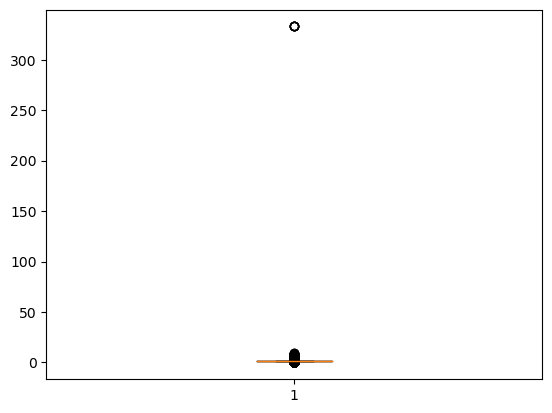

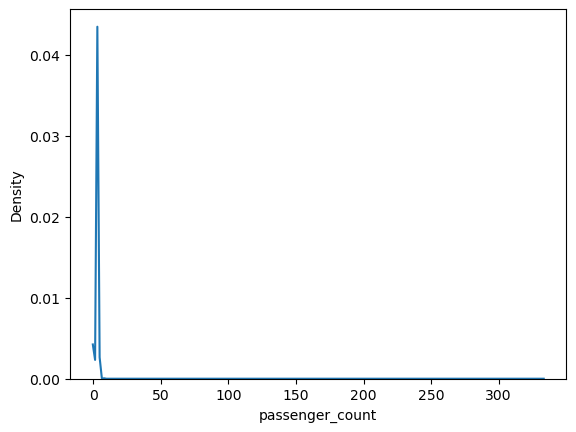

In [1153]:
#from the table above, we can see that there is an outlier since the max. value is 333, which is very far from the mean and other values. 
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'passenger_count')

In [1154]:
#Since the number of unique values of the passenger count are few and numerical discrete, we can;t use IQR
#Instead, we will use value_counts to see how many times each value was used. 
greentaxi_outliers_df.passenger_count.value_counts()

1      440410
0       53800
2       38845
5       14588
6        8461
3        7115
4        2824
8          11
333         5
7           4
9           2
Name: passenger_count, dtype: int64

In [1155]:
#The value '333' is a outlier doesn't make sense as it is very huge to be the number of passengers in one vehicle/ride.
#Also, it is repeated only 5 times, so we can remove it. 
#Same goes for values '7','8', & '9'. They are repeated very few times, so we will remove them. 

#so we will filter the dataset to have values of the passenger count between 0 and 6(inclusive)

def remove_value(df,col,cutoff):
    df=df[(df[col]<=cutoff)]
    return df

greentaxi_outliers_df = remove_value(greentaxi_outliers_df,'passenger_count',6)
#check distribution after handling
greentaxi_outliers_df.describe()

passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.529209      15.432848       1.085238   
std           1.004100       4.037650      14.911995       1.599335   
min           0.000000       0.000000    -130.080000      -4.500000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000     101.530000    2438.500000     399.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.968528       0.273499               0.258760   
std         0.085526       2.008968       1.329859               0.105954   
min        -0.500000      -2.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000     399.000000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

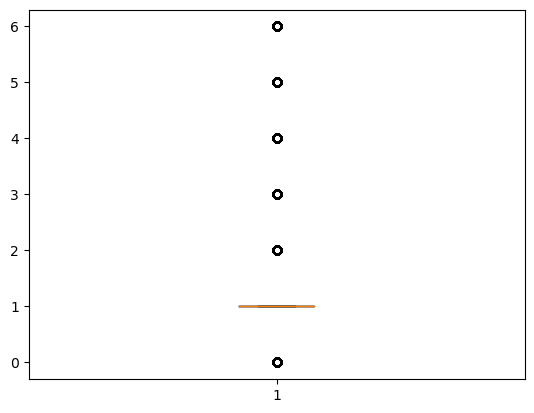

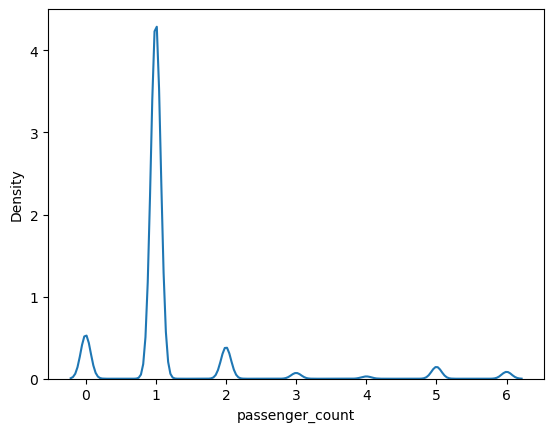

In [1156]:
#check dist. after handling outliers
visualize_outlier(greentaxi_outliers_df,'passenger_count')

### Observing and handling 'trip_distance' outliers

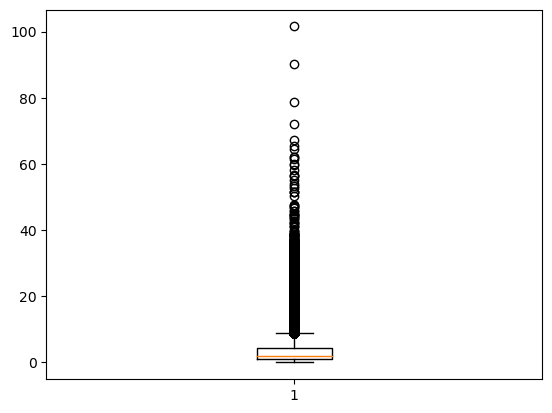

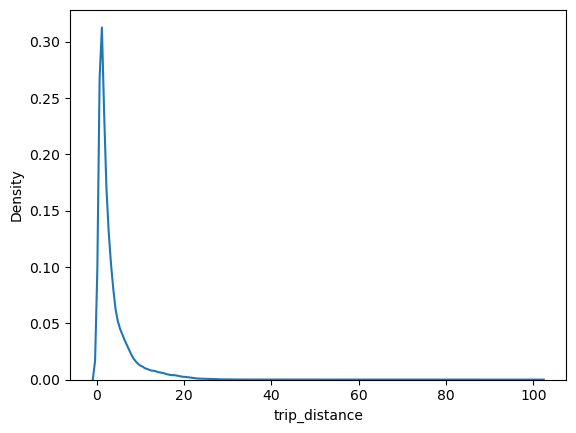

In [1157]:
#from the table above, we can see that there is an outlier since the max. value is 101, which is very far from the mean. 
#To be more accurate, we will check the skewness of this feature
visualize_outlier(greentaxi_outliers_df,'trip_distance')

In [1158]:
#as shown, the distribution is skewed. So, we will use IQR to detect how many outliers are there.
upper,lower=detect_with_IQR(greentaxi_outliers_df,'trip_distance')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.trip_distance> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.trip_distance < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

9.0 -3.6399999999999992
Total number of outliers are 48789


In [1159]:
#From the graph, we can see that starting from '20', the trip-distance feature has some outliers. 
#after some trial and error, we can see that approximately at 99.4th quantile, outliers are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.trip_distance.quantile(0.994))

#To handle them, we will use the Quantile-based Flooring and Capping method, starting from the 99.4th quantile.
#we will cap only as no outliers are introduced after the '0' value. floor_value=zero
#So, first we will get the cap value
cap_value= get_cap(greentaxi_outliers_df,'trip_distance',0.994)
#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'trip_distance',0,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

21.69


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.432848       1.085238   
std           1.004100       3.897707      14.911995       1.599335   
min           0.000000       0.000000    -130.080000      -4.500000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000    2438.500000     399.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.968528       0.273499               0.258760   
std         0.085526       2.008968       1.329859               0.105954   
min        -0.500000      -2.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000     399.000000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

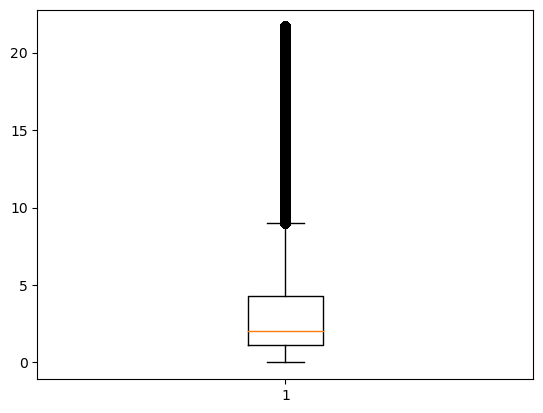

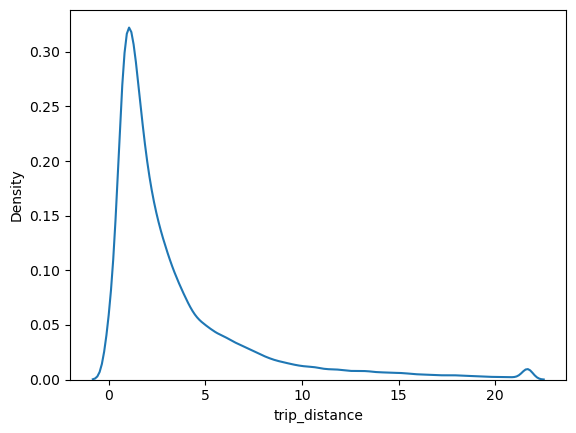

In [1160]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'trip_distance') 

### Observing and handling 'fare_amount' outliers

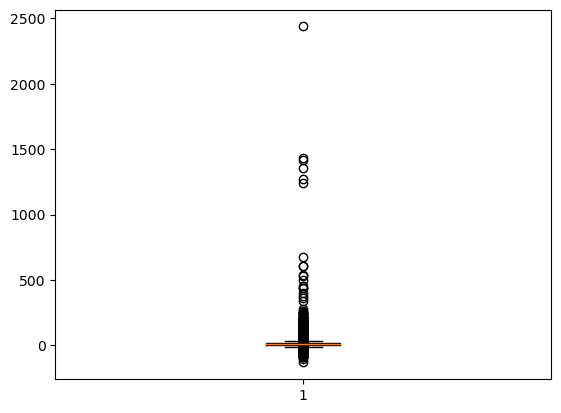

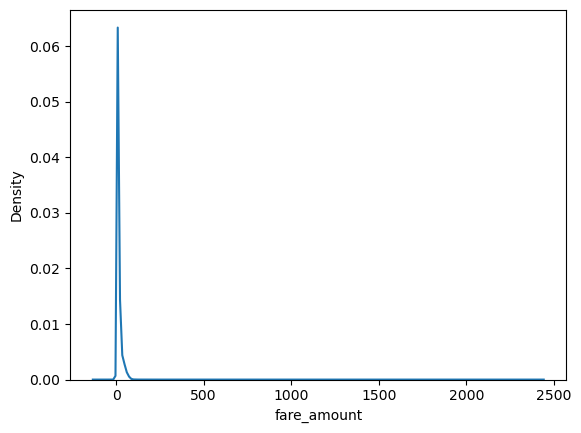

In [1161]:
#from the table above, the max value '2438' is very very far from the mean and doesn't make sense to pay a fare amount of '2438'. 
#So, we can say that there is an outlier
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'fare_amount')

In [1162]:
#As shown, we can see that there are outliers from both sides and the distribution is skewed.
#We will use IQR to detect the number of outliers
upper,lower=detect_with_IQR(greentaxi_outliers_df,'fare_amount')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.fare_amount> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.fare_amount < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

36.375 -10.625
Total number of outliers are 46655


In [1163]:
#We can't remove the outliers as their number are high. 
#From the graph, we can see that values greater than approximately 90 or less than 0 can be considered outliers.
#after some trial and error, we can see that approximately at 4th and 99.9rd quantile, lower and higher outliers,respectively,
#are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.fare_amount.quantile(0.999))
print(greentaxi_outliers_df.fare_amount.quantile(0.004))
#To handle them, we will use the Quantile-based Flooring and Capping method
#we will cap and floor since outliers are introduced at both sides.
#So, first we will get the cap value and floor value
cap_value= get_cap(greentaxi_outliers_df,'fare_amount',0.999)
floor_value= get_cap(greentaxi_outliers_df,'fare_amount',0.004)

#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'fare_amount',floor_value,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

89.5
0.0


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.416073       1.085238   
std           1.004100       3.897707      13.580378       1.599335   
min           0.000000       0.000000       0.000000      -4.500000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000      89.500000     399.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.968528       0.273499               0.258760   
std         0.085526       2.008968       1.329859               0.105954   
min        -0.500000      -2.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000     399.000000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

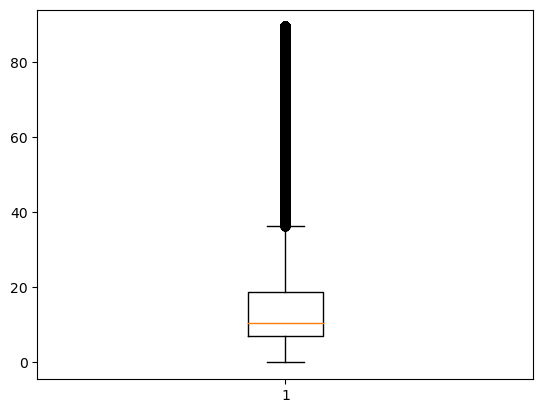

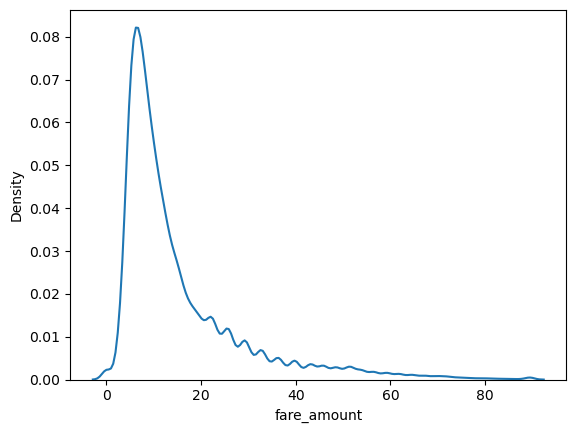

In [1164]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'fare_amount')

As shown, there was no major change in the distribution(which is needed). We just cut the outliers to improve the mean and median values

### Observing and handling 'extra' outliers

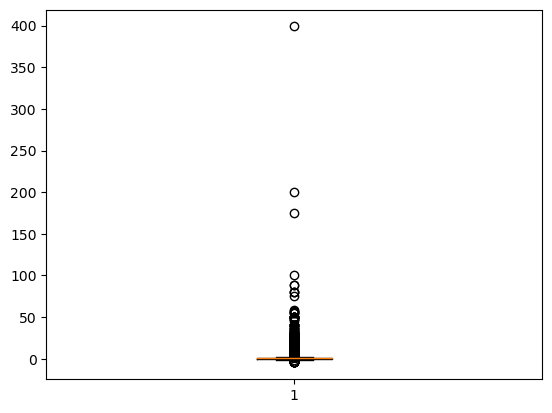

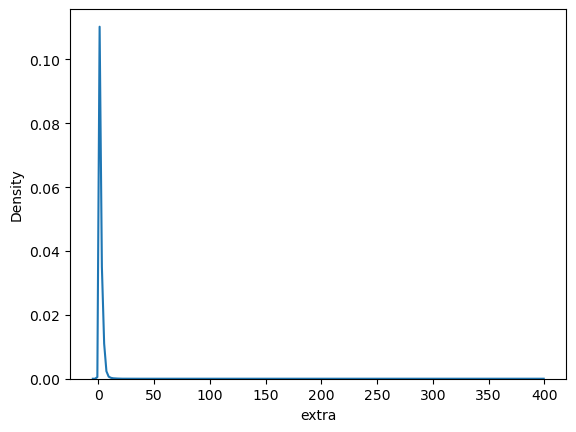

In [1165]:
#from the table above, the max value '399' is very very far from the mean and doesn't make sense to pay an extra fee of '399'. 
#So, we can say that there is an outlier
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'extra')

In [1166]:
#As shown, we can see that there are outliers from the upper side and the distribution is skewed.
#We will use IQR to detect the number of outliers
upper,lower=detect_with_IQR(greentaxi_outliers_df,'extra')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.extra> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.extra < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

2.5 -1.5
Total number of outliers are 96289


In [1167]:
#since the number of outliers are huge, we can not remove them. Instead, we will use flooring and capping method. 
#From the graph, we can see that values greater than approximately '10' can be considered outliers.
#we can also visualize that very fewoutliers are detected from the lower side.after '0'
#after some trial and error, we can see that approximately at 3rd and 99.5th quantile, lower and higher outliers,respectively,
#are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.extra.quantile(0.995))
print(greentaxi_outliers_df.extra.quantile(0.003))
#To handle them, we will use the Quantile-based Flooring and Capping method. 
#we will cap and floor since outliers are introduced at both sides.
#So, first we will get the cap value and floor value
cap_value= get_cap(greentaxi_outliers_df,'extra',0.995)
floor_value= get_cap(greentaxi_outliers_df,'extra',0.003)

#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'extra',floor_value,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

8.0
0.0


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.416073       1.068910   
std           1.004100       3.897707      13.580378       1.296607   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000      89.500000       8.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.968528       0.273499               0.258760   
std         0.085526       2.008968       1.329859               0.105954   
min        -0.500000      -2.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000     399.000000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

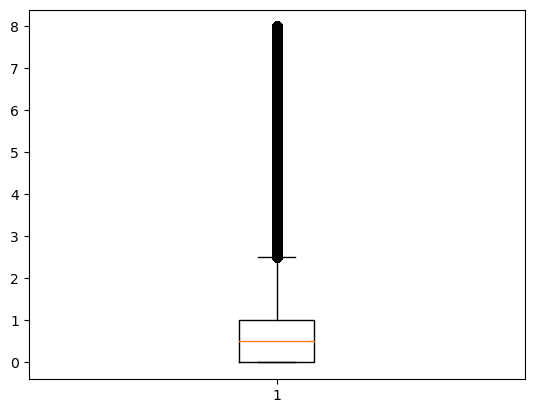

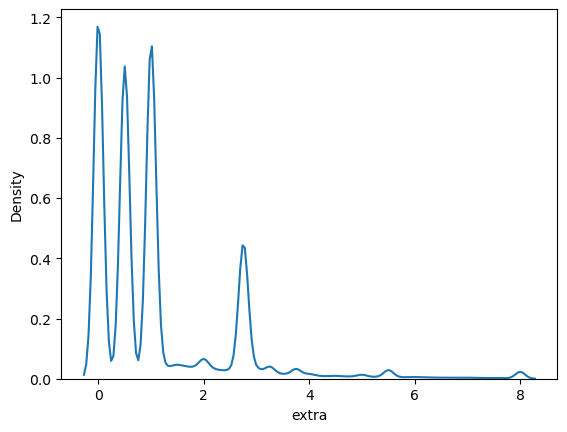

In [1168]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'extra')

Overall, the distribution didn't change, but there are several peaks introduced. 

### Observing and handling 'tip_amount' outliers

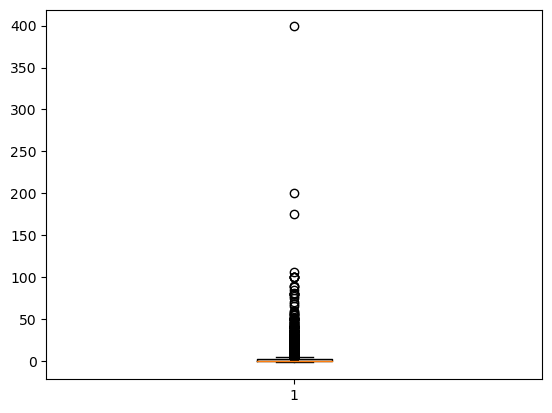

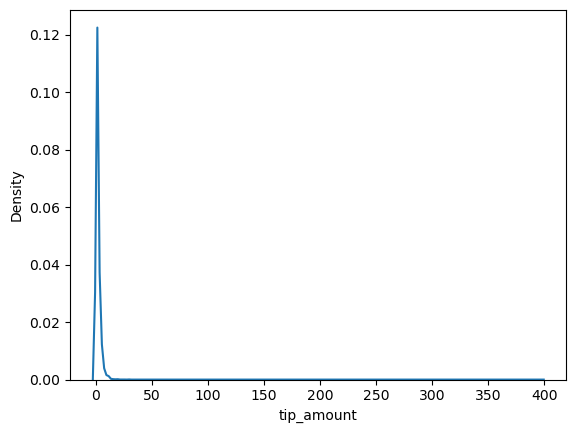

In [1169]:
#from the table above, the max value '399' is very very far from the mean and doesn't make sense to tip the driver a value of '399'. 
#So, we can say that there is an outlier
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'tip_amount')

In [1170]:
#As shown, we can see that there are outliers from the upper side and the distribution is skewed.
#We will use IQR to detect the number of outliers
upper,lower=detect_with_IQR(greentaxi_outliers_df,'tip_amount')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.tip_amount> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.tip_amount < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

3.95 -2.37
Total number of outliers are 35927


In [1171]:
#since the number of outliers are huge, we can not remove them. Instead, we will use flooring and capping method. 
#From the graph, we can see that values greater than approximately '9' can be considered outliers.
#we can also visualize that there are negative values detected from the lower side--> after '0'
#after some trial and error, we can see that approximately at 10th and 99.4th quantile, lower and higher outliers are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.tip_amount.quantile(0.994))
print(greentaxi_outliers_df.tip_amount.quantile(0.10))
#To handle them, we will use the Quantile-based Flooring and Capping method. 
#we will cap and floor since outliers are introduced at both sides. 
#So, first we will get the cap value and floor value
cap_value= get_cap(greentaxi_outliers_df,'tip_amount',0.994)
floor_value= get_floor(greentaxi_outliers_df,'tip_amount',0.10)

#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'tip_amount',floor_value,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

9.01
0.0


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.416073       1.068910   
std           1.004100       3.897707      13.580378       1.296607   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000      89.500000       8.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.942368       0.273499               0.258760   
std         0.085526       1.654279       1.329859               0.105954   
min        -0.500000       0.000000     -21.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000       9.010000      50.000000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

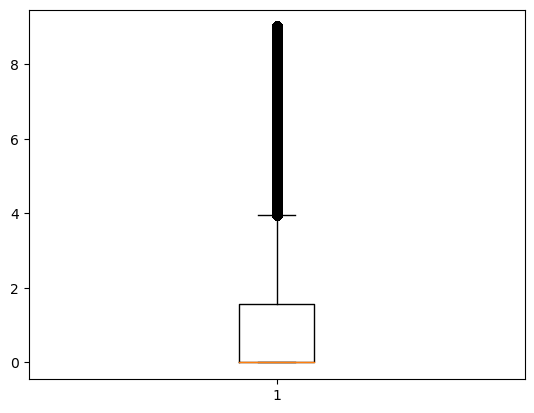

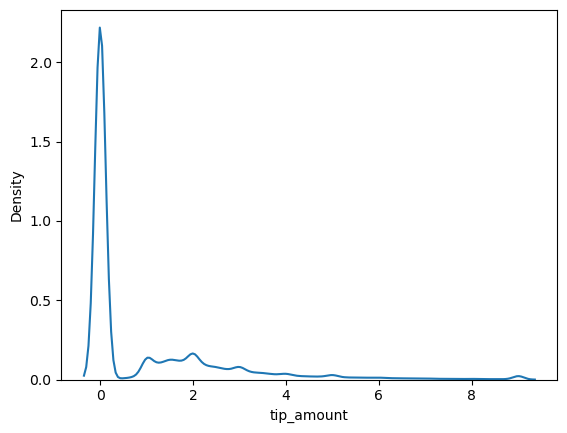

In [1172]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'tip_amount')

The distribution is still the same. No huge peaks are introduced. 

### Observing and handling 'tolls_amount' outliers

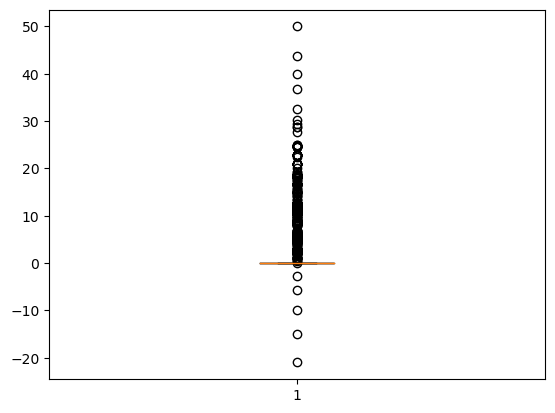

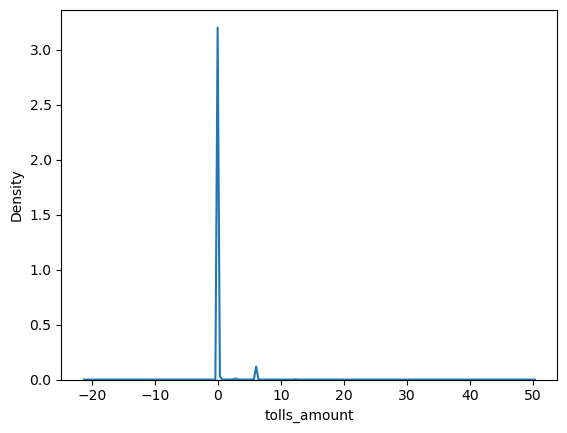

In [1173]:
#from the table above, the max value '50' and min value '-21' are very very far from the mean 
#So, we can say that there is an outlier
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'tolls_amount')

In [1174]:
#As shown, we can see that there are outliers from the upper side and lower side and the distribution is skewed.
#We will use IQR to detect the number of outliers
upper,lower=detect_with_IQR(greentaxi_outliers_df,'tolls_amount')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.tolls_amount> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.tolls_amount < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

0.0 0.0
Total number of outliers are 25411


In [1175]:
#since the number of outliers are huge, we can not remove them. Instead, we will use flooring and capping method. 
#From the graph, we can see that values greater than approximately '1.5' can be considered outliers.
#we can also visualize that there are negative values detected from the lower side--> after '0'
#after some trial and error, we can see that approximately at 10th and 95.54rd quantile, lower and higher outliers are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.tolls_amount.quantile(0.9554))
print(greentaxi_outliers_df.tolls_amount.quantile(0.10))
#To handle them, we will use the Quantile-based Flooring and Capping method. 
#we will cap and floor since outliers are introduced at both sides. 
#So, first we will get the cap value and floor value
cap_value= get_cap(greentaxi_outliers_df,'tolls_amount',0.9554)
floor_value= get_floor(greentaxi_outliers_df,'tolls_amount',0.10)

#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'tolls_amount',floor_value,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

2.29
0.0


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.416073       1.068910   
std           1.004100       3.897707      13.580378       1.296607   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000      89.500000       8.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.942368       0.102745               0.258760   
std         0.085526       1.654279       0.474015               0.105954   
min        -0.500000       0.000000       0.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000       9.010000       2.290000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.381930              0.275836  
std        16.224024              1.019256  
min      -130.080000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max      2438.800000              2.750000

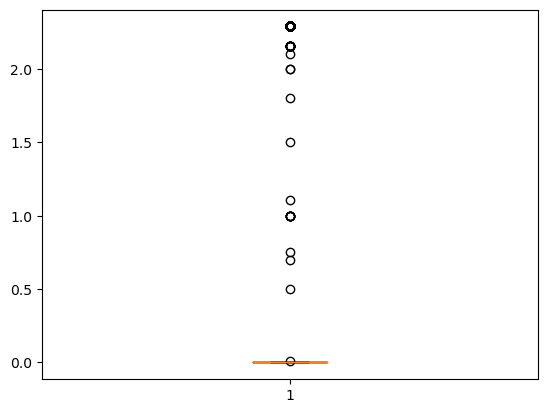

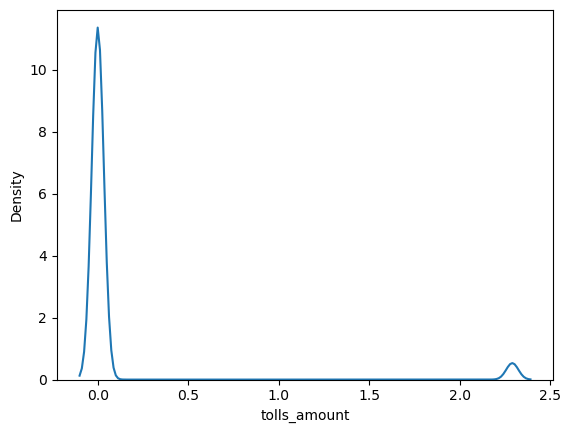

In [1176]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'tolls_amount')

### Observing and handling 'total_amount' outliers

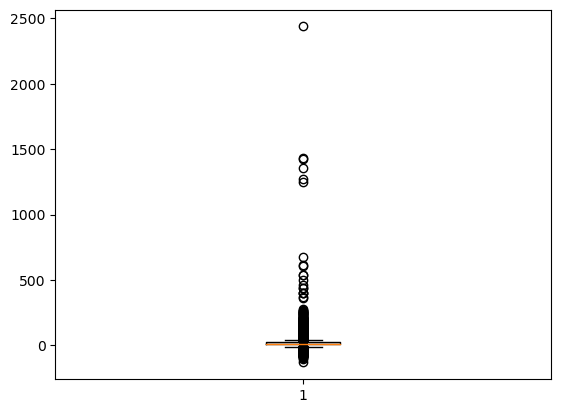

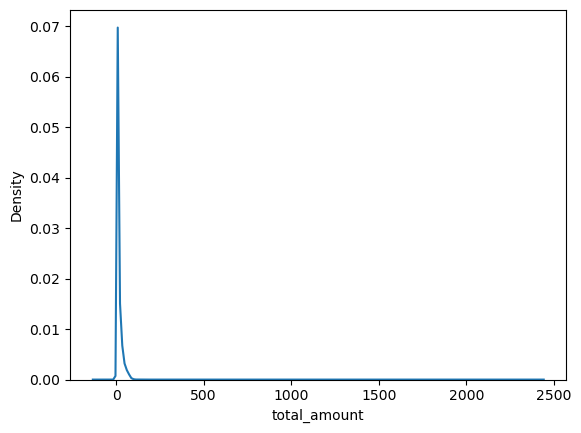

In [1177]:
#from the table above, the max value '2438' and min value '-130' are very very far from the mean 
#So, we can say that there is an outlier
#To be more accurate, we will check the distribution of this feature
visualize_outlier(greentaxi_outliers_df,'total_amount')

In [1178]:
#As shown, we can see that there are outliers from the upper side and lower side and the distribution is skewed.
#We will use IQR to detect the number of outliers
upper,lower=detect_with_IQR(greentaxi_outliers_df,'total_amount')
print(upper,lower)
df1 = greentaxi_outliers_df[greentaxi_outliers_df.total_amount> upper]
df2 = greentaxi_outliers_df[greentaxi_outliers_df.total_amount < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

43.86 -12.300000000000002
Total number of outliers are 41340


In [1179]:
#since the number of outliers are huge, we can not remove them. Instead, we will use flooring and capping method. 
#From the graph, we can see that values greater than approximately '100' can be considered outliers.
#we can also visualize that there are negative values detected from the lower side--> after '0'
#after some trial and error, we can see that approximately at 4th and 99.9th quantile, lower and higher outliers are introduced.--> a jump introduced. 
print(greentaxi_outliers_df.total_amount.quantile(0.999))
print(greentaxi_outliers_df.total_amount.quantile(0.004))
#To handle them, we will use the Quantile-based Flooring and Capping method. 
#we will cap and floor since outliers are introduced at both sides. 
#So, first we will get the cap value and floor value
cap_value= get_cap(greentaxi_outliers_df,'total_amount',0.999)
floor_value= get_floor(greentaxi_outliers_df,'total_amount',0.004)

#then handle the outliers
handle_floor_cap(greentaxi_outliers_df,'total_amount',floor_value,cap_value)

#check distribution after handling
greentaxi_outliers_df.describe()

98.5
0.0


passenger_count  trip_distance    fare_amount          extra  \
count    566043.000000  566043.000000  566043.000000  566043.000000   
mean          1.191512       3.505183      15.416073       1.068910   
std           1.004100       3.897707      13.580378       1.296607   
min           0.000000       0.000000       0.000000       0.000000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.060000      10.500000       0.500000   
75%           1.000000       4.260000      18.750000       1.000000   
max           6.000000      21.690000      89.500000       8.000000   

             mta_tax     tip_amount   tolls_amount  improvement_surcharge  \
count  566043.000000  566043.000000  566043.000000          566043.000000   
mean        0.488272       0.942368       0.102745               0.258760   
std         0.085526       1.654279       0.474015               0.105954   
min        -0.500000       0.000000       0.000000              -0.300000   
25%         0.500000       0.000000       0.000000               0.300000   
50%         0.500000       0.000000       0.000000               0.300000   
75%         0.500000       1.580000       0.000000               0.300000   
max         3.550000       9.010000       2.290000               0.300000   

        total_amount  congestion_surcharge  
count  566043.000000         566043.000000  
mean       18.363299              0.275836  
std        14.950892              1.019256  
min         0.000000             -2.750000  
25%         8.760000              0.000000  
50%        12.800000              0.000000  
75%        22.800000              0.000000  
max        98.500000              2.750000

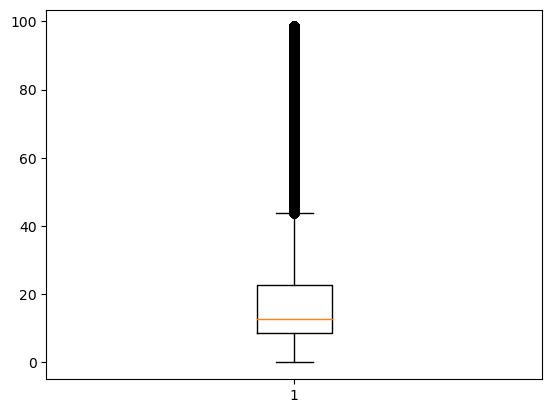

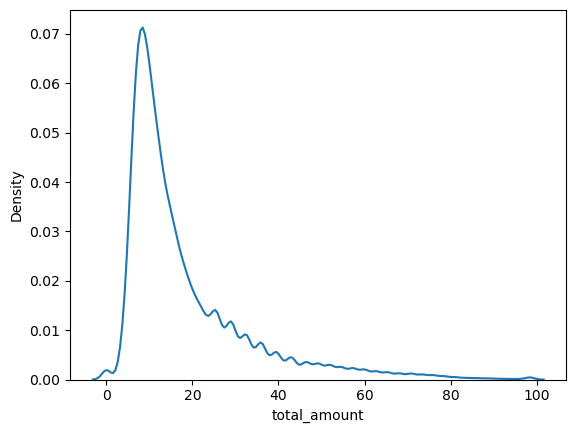

In [1180]:
#check distribution after handling
visualize_outlier(greentaxi_outliers_df,'total_amount')

# 4 - Data transformation and feature eng.

## 4.1 - Discretization

In [1181]:
#After handling all data, we will take copy from the last updated dataset (greentaxi_outliers_df) and work on it to discretize
greentaxi_dis=greentaxi_outliers_df.copy()
#drop excess columns made due to the handling techniques
greentaxi_discretize=greentaxi_dis.drop(columns=['pickup_time','Pickup City','Dropoff City','datetime'])
greentaxi_discretize

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567847                      VeriFone Inc.  2019-04-30 23:36:00   
567848                      VeriFone Inc.  2019-04-30 23:39:00   
567849                      VeriFone Inc.  2019-04-30 23:07:00   
567850                      VeriFone Inc.  2019-04-30 23:29:00   
567851                      VeriFone Inc.  2019-04-30 23:34:00   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567847   2019-04-30 23:58:00            Missing        Unknown   
567848   2019-04-30 23:52:00            Missing        Unknown   
567849   2019-04-30 23:16:00            Missing        Unknown   
567850   2019-05-01 00:02:00            Missing        Unknown   
567851   2019-05-01 00:17:00            Missing        Unknown   

                      pu_location                  do_location  \
0          Queens,Jackson Heights           Manhattan,Union Sq   
1                  Queens,Astoria      Queens,Elmhurst/Maspeth   
2                 Queens,Elmhurst              Queens,Elmhurst   
3                 Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4                  Queens,Astoria       Queens,Jackson Heights   
...                           ...                          ...   
567847  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848           Bronx,Highbridge  Manhattan,East Harlem South   
567849              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                     1           7.72        24.00   0.50      0.5   
1                     1           2.73        11.00   0.50      0.5   
2                     1           1.57         7.00   0.50      0.5   
3                     1           0.88         8.00   0.50      0.5   
4                     1           3.10        12.00   0.50      0.5   
...                 ...            ...          ...    ...      ...   
567847                0          13.44        54.05   2.75      0.5   
567848                0           4.94        32.75   2.75      0.5   
567849                0           2.66        22.25   2.75      0.5   
567850                0           8.12        43.20   5.50      0.5   
567851                0          15.10        59.45   2.75      0.5   

        tip_amount  tolls_amount  improvement_surcharge  total_amount  \
0              0.0          2.29                    0.3         34.17   
1              0.0          0.00                    0.3         12.30   
2              0.0          0.00                    0.3          8.30   
3              0.0          0.00                    0.3          9.30   
4              0.0          0.00                    0.3         13.30   
...            ...           ...                    ...           ...   
567847         0.0          0.00                    0.0         57.30   
567848         0.0          0.00                    0.0         36.00   
567849         0.0          0.00                    0.0         25.50   
567850         0.0          0.00                    0.0         49.20   


In [1182]:
def add_week(df,col):
    df['week_number'] = (df[col].dt.day //7)+1

greentaxi_discretize['lpep_pickup_datetime'] = pd.to_datetime(greentaxi_discretize['lpep_pickup_datetime'])
add_week(greentaxi_discretize,'lpep_pickup_datetime')

In [1183]:
count_week = greentaxi_discretize.week_number.value_counts()
count_week

2    134736
3    128759
1    128357
4    123768
5     50423
Name: week_number, dtype: int64

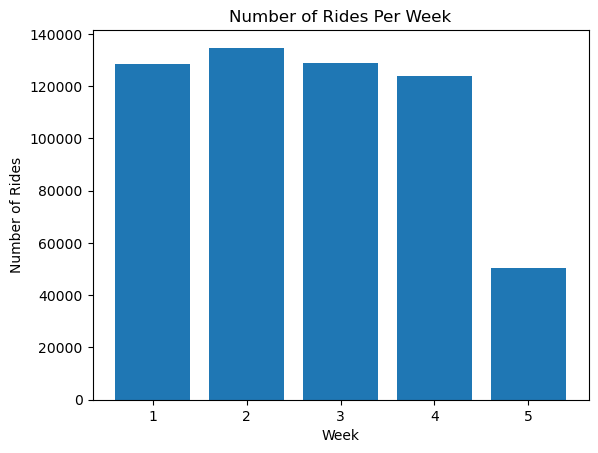

In [1184]:
#It can be inferred that week 5 had the least number of trips/rides and week 2 had the largest number of trips/rides
plt.bar(count_week.index,count_week)
plt.title('Number of Rides Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Rides')
plt.show()

In [1185]:
def add_day(df,col):
    df['day_range'] = (df[col].dt.day)
add_day(greentaxi_discretize,'lpep_pickup_datetime')

In [1186]:
count_day = greentaxi_discretize.day_range.value_counts()
count_day

5     23314
4     22274
3     21270
6     21227
12    21146
2     20565
11    20181
18    19985
1     19707
13    19457
10    19223
17    19198
26    19137
9     18998
25    18939
27    18652
20    18432
16    18390
19    18310
15    18280
7     18042
24    17971
30    17782
8     17689
29    17074
23    16837
22    16188
14    16164
21    16044
28    15567
Name: day_range, dtype: int64

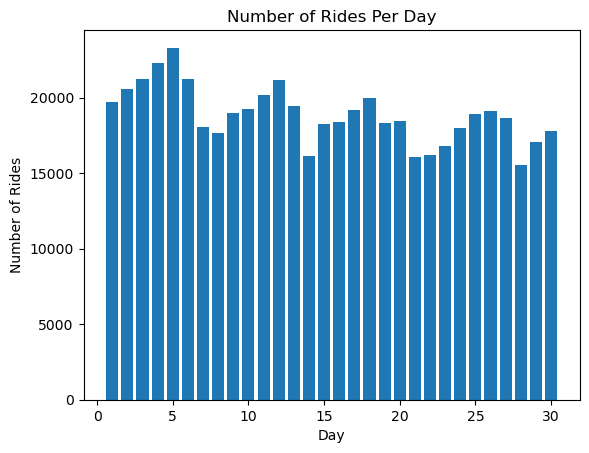

In [1187]:
#It can be inferred that day 28 had the least number of trips/rides and day 5 had the largest number of trips/rides
plt.bar(count_day.index,count_day)
plt.title('Number of Rides Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

## 4.2 - Encoding

In [1188]:
greentaxi_encode=greentaxi_discretize.copy()
greentaxi_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566043 entries, 0 to 567851
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   vendor                 566043 non-null  object        
 1   lpep_pickup_datetime   566043 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  566043 non-null  object        
 3   store_and_fwd_flag     566043 non-null  object        
 4   rate_type              566043 non-null  object        
 5   pu_location            566043 non-null  object        
 6   do_location            566043 non-null  object        
 7   passenger_count        566043 non-null  int32         
 8   trip_distance          566043 non-null  float64       
 9   fare_amount            566043 non-null  float64       
 10  extra                  566043 non-null  float64       
 11  mta_tax                566043 non-null  float64       
 12  tip_amount             566043 non-null  floa

As the encoding is done on caegorical features only, we will perform encoding on 'vendor','rate_type','payment_type','trip_type'

### Encoding 'vendor' feature

In [1189]:
greentaxi_encode

vendor lpep_pickup_datetime  \
0                           VeriFone Inc.  2019-04-01 00:18:40   
1                           VeriFone Inc.  2019-04-01 00:18:24   
2                           VeriFone Inc.  2019-04-01 00:31:24   
3                           VeriFone Inc.  2019-04-01 00:48:30   
4       Creative Mobile Technologies, LLC  2019-04-01 00:04:42   
...                                   ...                  ...   
567847                      VeriFone Inc.  2019-04-30 23:36:00   
567848                      VeriFone Inc.  2019-04-30 23:39:00   
567849                      VeriFone Inc.  2019-04-30 23:07:00   
567850                      VeriFone Inc.  2019-04-30 23:29:00   
567851                      VeriFone Inc.  2019-04-30 23:34:00   

       lpep_dropoff_datetime store_and_fwd_flag      rate_type  \
0        2019-04-01 00:37:56                  N  Standard rate   
1        2019-04-01 00:28:09                  N  Standard rate   
2        2019-04-01 00:38:28                  N  Standard rate   
3        2019-04-01 00:58:28                  N  Standard rate   
4        2019-04-01 00:16:50                  N  Standard rate   
...                      ...                ...            ...   
567847   2019-04-30 23:58:00            Missing        Unknown   
567848   2019-04-30 23:52:00            Missing        Unknown   
567849   2019-04-30 23:16:00            Missing        Unknown   
567850   2019-05-01 00:02:00            Missing        Unknown   
567851   2019-05-01 00:17:00            Missing        Unknown   

                      pu_location                  do_location  \
0          Queens,Jackson Heights           Manhattan,Union Sq   
1                  Queens,Astoria      Queens,Elmhurst/Maspeth   
2                 Queens,Elmhurst              Queens,Elmhurst   
3                 Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4                  Queens,Astoria       Queens,Jackson Heights   
...                           ...                          ...   
567847  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848           Bronx,Highbridge  Manhattan,East Harlem South   
567849              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  ...  mta_tax  tip_amount  \
0                     1           7.72        24.00  ...      0.5         0.0   
1                     1           2.73        11.00  ...      0.5         0.0   
2                     1           1.57         7.00  ...      0.5         0.0   
3                     1           0.88         8.00  ...      0.5         0.0   
4                     1           3.10        12.00  ...      0.5         0.0   
...                 ...            ...          ...  ...      ...         ...   
567847                0          13.44        54.05  ...      0.5         0.0   
567848                0           4.94        32.75  ...      0.5         0.0   
567849                0           2.66        22.25  ...      0.5         0.0   
567850                0           8.12        43.20  ...      0.5         0.0   
567851                0          15.10        59.45  ...      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  payment_type  \
0               2.29                    0.3         34.17          Cash   
1               0.00                    0.3         12.30          Cash   
2               0.00                    0.3          8.30          Cash   
3               0.00                    0.3          9.30          Cash   
4               0.00                    0.3         13.30          Cash   
...              ...                    ...           ...           ...   
567847          0.00                    0.0         57.30       Unknown   
567848          0.00                    0.0         36.00       Unknown   
567849  

In [1190]:
def encode_one_hot(df,col):
    df = pd.get_dummies(df, columns =[col])
    return df

In [1191]:
#We will use One-hot encoding for the vendor feature as their unique values are not huge at all.
greentaxi_encode= encode_one_hot(greentaxi_encode,'vendor')
greentaxi_encode

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

            rate_type                pu_location                  do_location  \
0       Standard rate     Queens,Jackson Heights           Manhattan,Union Sq   
1       Standard rate             Queens,Astoria      Queens,Elmhurst/Maspeth   
2       Standard rate            Queens,Elmhurst              Queens,Elmhurst   
3       Standard rate            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4       Standard rate             Queens,Astoria       Queens,Jackson Heights   
...               ...                        ...                          ...   
567847        Unknown  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848        Unknown           Bronx,Highbridge  Manhattan,East Harlem South   
567849        Unknown              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850        Unknown    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851        Unknown              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        improvement_surcharge  total_amount  payment_type    trip_type  \
0                         0.3         34.17          Cash  Street-hail   
1                         0.3         12.30          Cash  Street-hail   
2                         0.3          8.30          Cash  Street-hail   
3                         0.3          9.30          Cash  Street-hail   
4                         0.3         13.30          Cash  Street-hail   
...                       ...           ...           ...          ...   
567847                    0.0         57.30       Unknown      Unknown   
567848                    0.0         36.00       Unknown      Unknown   
567849                    0.0         25.50       Unknown      Unknown   
567850                    0.0         49.20       Unknown      Unknown   
567851                    0.0         62.70       Unknown      Unknown   

        congestion_surcharge week_number day_range  \
0                       2.75           1         1   
1                       0.00           1         1   
2                       0.00           1         1   
3                       0.00           1         1   
4                       0.00           1         1   
...                      ...         ...       ...   
567847                 -1.00           5        30   
567848                 -1.00           5   

As shown in the dataset, the vendor column now is divided to 3 columns one for each type of vendor.

### Encoding 'rate_type' feature

In [1192]:
#First we will get the unique values of the rate_type
greentaxi_encode.rate_type.unique()

array(['Standard rate', 'Negotiated fare', 'Nassau or Westchester', 'JFK',
       'Newark', 'Group ride', 'Unknown'], dtype=object)

In [1193]:
#there are few types of the rate--> one-hot encoding will be applicable, but it is not ideal as the size of the dataset will be very large
#So we will use Label Encoding
#Also, we will add it to our lookup table as this is label encoding
def encode_label(df,col,lookup_table):
    encoded_values = preprocessing.LabelEncoder().fit_transform(df[col])
    
    #create a dataframe to add it to our lookup_table
    map_values = pd.DataFrame({
        'Column Name' : [col] * len(encoded_values),
        'Original Value' : df[col],
        'Imputed Value': encoded_values})
    df[col]=encoded_values
    
    return df, pd.concat([lookup_table,map_values.drop_duplicates()])

greentaxi_encode,lookup_table_df=encode_label(greentaxi_encode,'rate_type',lookup_table_df)
greentaxi_encode

    

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        improvement_surcharge  total_amount  payment_type    trip_type  \
0                         0.3         34.17          Cash  Street-hail   
1                         0.3         12.30          Cash  Street-hail   
2                         0.3          8.30          Cash  Street-hail   
3                         0.3          9.30          Cash  Street-hail   
4                         0.3         13.30          Cash  Street-hail   
...                       ...           ...           ...          ...   
567847                    0.0         57.30       Unknown      Unknown   
567848                    0.0         36.00       Unknown      Unknown   
567849                    0.0         25.50       Unknown      Unknown   
567850                    0.0         49.20       Unknown      Unknown   
567851                    0.0         62.70       Unknown      Unknown   

        congestion_surcharge week_number day_range  \
0                       2.75           1         1   
1                       0.00           1         1   
2                       0.00           1         1   
3                       0.00           1         1   
4                       0.00           1         1   
...                      ...         ...       ...   
567847                 -1.00           5        30   
567848                 -1.00           5        30   
567849                 -1.00         

In [1194]:
lookup_table_df

Column Name         Original Value Imputed Value
0         store_and_fwd_flag                    NaN       Missing
0       congestion_surcharge                    NaN            -1
0            passenger_count                    NaN             0
0                  rate_type          Standard rate             5
20                 rate_type        Negotiated fare             3
364                rate_type  Nassau or Westchester             2
622                rate_type                    JFK             1
2567               rate_type                 Newark             4
49450              rate_type             Group ride             0
195596             rate_type                Unknown             6

### Encoding 'payment_type' feature

In [1195]:
#First we will get the unique values of the payment_type
greentaxi_encode.payment_type.unique()

array(['Cash', 'Credit card', 'No charge', 'Dispute', 'Uknown', 'Unknown'],
      dtype=object)

In [1196]:
#there are several types of the payment
#So we will use Label Encoding
#Also, we will add it to our lookup table as this is label encoding
greentaxi_encode,lookup_table_df=encode_label(greentaxi_encode,'payment_type',lookup_table_df)
greentaxi_encode

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        improvement_surcharge  total_amount  payment_type    trip_type  \
0                         0.3         34.17             0  Street-hail   
1                         0.3         12.30             0  Street-hail   
2                         0.3          8.30             0  Street-hail   
3                         0.3          9.30             0  Street-hail   
4                         0.3         13.30             0  Street-hail   
...                       ...           ...           ...          ...   
567847                    0.0         57.30             5      Unknown   
567848                    0.0         36.00             5      Unknown   
567849                    0.0         25.50             5      Unknown   
567850                    0.0         49.20             5      Unknown   
567851                    0.0         62.70             5      Unknown   

        congestion_surcharge  week_number day_range  \
0                       2.75            1         1   
1                       0.00            1         1   
2                       0.00            1         1   
3                       0.00            1         1   
4                       0.00            1         1   
...                      ...          ...       ...   
567847                 -1.00            5        30   
567848                 -1.00            5        30   
567849                 -1.00

In [1197]:
#get our lookup table after adding the encoding of the payment type
lookup_table_df

Column Name         Original Value Imputed Value
0         store_and_fwd_flag                    NaN       Missing
0       congestion_surcharge                    NaN            -1
0            passenger_count                    NaN             0
0                  rate_type          Standard rate             5
20                 rate_type        Negotiated fare             3
364                rate_type  Nassau or Westchester             2
622                rate_type                    JFK             1
2567               rate_type                 Newark             4
49450              rate_type             Group ride             0
195596             rate_type                Unknown             6
0               payment_type                   Cash             0
5               payment_type            Credit card             1
45              payment_type              No charge             3
527             payment_type                Dispute             2
5862            payment_type                 Uknown             4
514037          payment_type                Unknown             5

### Encoding 'trip_type' feature

In [1198]:
#First we will get the unique values of the payment_type
greentaxi_encode.trip_type.unique()

array(['Street-hail', 'Dispatch', 'Unknown'], dtype=object)

In [1199]:
#We will use One-hot encoding for the trip_type feature as there are 3 unique values only.
greentaxi_encode= encode_one_hot(greentaxi_encode,'trip_type')
greentaxi_encode

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  payment_type  \
0                     1           7.72        24.00   0.50  ...             0   
1                     1           2.73        11.00   0.50  ...             0   
2                     1           1.57         7.00   0.50  ...             0   
3                     1           0.88         8.00   0.50  ...             0   
4                     1           3.10        12.00   0.50  ...             0   
...                 ...            ...          ...    ...  ...           ...   
567847                0          13.44        54.05   2.75  ...             5   
567848                0           4.94        32.75   2.75  ...             5   
567849                0           2.66        22.25   2.75  ...             5   
567850                0           8.12        43.20   5.50  ...             5   
567851                0          15.10        59.45   2.75  ...             5   

        congestion_surcharge  week_number  day_range  \
0                       2.75            1          1   
1                       0.00            1          1   
2                       0.00            1          1   
3                       0.00            1          1   
4                       0.00            1          1   
...                      ...          ...        ...   
567847                 -1.00            5         30   
567848                 -1.00            5         30   
567849                 -1.00            5         30   
567850                 -1.00            5         30   
567851                 -1.00            5         30   

        vendor_Creative Mobile Technologies, LLC  vendor_Unknown  \
0                                              0               0   
1                                              0               0   
2                                              0               0   
3                                              0               0   
4                                              1               0   
...                                          ...             ...   
567847                                         0               0   
567848                     

## 4.3 - Normalisation 

Since we don't know the type of the machine learning model that will be used for this dataset, normalisation won't be applicable here 

## 4.4 - Adding more features(feature eng.)

In [1200]:
greentaxi_add=greentaxi_encode.copy()

We can create a feature that calculates the average speed of the trip by dividing the trip distance by the trip duration.
So, first we will get the trip durations

In [1201]:
greentaxi_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566043 entries, 0 to 567851
Data columns (total 25 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   lpep_pickup_datetime                      566043 non-null  datetime64[ns]
 1   lpep_dropoff_datetime                     566043 non-null  object        
 2   store_and_fwd_flag                        566043 non-null  object        
 3   rate_type                                 566043 non-null  int32         
 4   pu_location                               566043 non-null  object        
 5   do_location                               566043 non-null  object        
 6   passenger_count                           566043 non-null  int32         
 7   trip_distance                             566043 non-null  float64       
 8   fare_amount                               566043 non-null  float64       
 9   extra          

In [1202]:
#since we converted the type of the pickup time to datetime before, we will only do the same to the dropoff datetime
greentaxi_add['lpep_dropoff_datetime'] = pd.to_datetime(greentaxi_add['lpep_dropoff_datetime'])
greentaxi_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566043 entries, 0 to 567851
Data columns (total 25 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   lpep_pickup_datetime                      566043 non-null  datetime64[ns]
 1   lpep_dropoff_datetime                     566043 non-null  datetime64[ns]
 2   store_and_fwd_flag                        566043 non-null  object        
 3   rate_type                                 566043 non-null  int32         
 4   pu_location                               566043 non-null  object        
 5   do_location                               566043 non-null  object        
 6   passenger_count                           566043 non-null  int32         
 7   trip_distance                             566043 non-null  float64       
 8   fare_amount                               566043 non-null  float64       
 9   extra          

In [1203]:
#Then, we will calculate the speed by dividing the trip distance over the trip duration.
#trip duration is calculated by subtracting the dropoff time from the pickup time and converting it to seconds 

def add_speed(df,col1,col2,col3):
        df['average_speed']= df[col1] / ((df[col3] - df[col2]).dt.total_seconds())

add_speed(greentaxi_add,'trip_distance','lpep_pickup_datetime','lpep_dropoff_datetime')


In [1204]:
print(greentaxi_add.average_speed.unique())
greentaxi_add

[0.0066782  0.00466667 0.00370283 ... 0.00685106 0.01018182 0.00410101]


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        congestion_surcharge  week_number  day_range  \
0                       2.75            1          1   
1                       0.00            1          1   
2                       0.00            1          1   
3                       0.00            1          1   
4                       0.00            1          1   
...                      ...          ...        ...   
567847                 -1.00            5         30   
567848                 -1.00            5         30   
567849                 -1.00            5         30   
567850                 -1.00            5         30   
567851                 -1.00            5         30   

        vendor_Creative Mobile Technologies, LLC  vendor_Unknown  \
0                                              0               0   
1                                              0               0   
2                                              0               0   
3                                              0               0   
4                                              1               0   
...                                          ...             ...   
567847                                         0               0   
567848                                         0               0   
567849                                         0               0   
567850                                         0           

In [1205]:
#We can also create a binary feature 'Weekend/Weekday' indicating whether a trip occurred on a weekend or a weekday based on the 'lpep pickup datetime'.
#Weekdays are from Monday to Friday 
#Weekends are Saturday and Sunday 
def add_weekday_weekend(df,col):
    df['weekend_weekday'] = df[col].apply(lambda x: 'Weekday' if x.weekday() < 5 else 'Weekend')
    #weekday() returns a value between 0 and 6(inclusive) 
    #'0' indicates 'Monday', '1' indicates 'Tuesday', '2' indicates 'Wednesday', '3' indicates 'Thursday', '4' indicates 'Friday'
    #'5' indicates 'Saturday' , and '6' indicates 'Sunday'
    
    
add_weekday_weekend(greentaxi_add,'lpep_pickup_datetime')

In [1206]:
print(greentaxi_add.weekend_weekday.unique())
greentaxi_add

['Weekday' 'Weekend']


lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  week_number  \
0                     1           7.72        24.00   0.50  ...            1   
1                     1           2.73        11.00   0.50  ...            1   
2                     1           1.57         7.00   0.50  ...            1   
3                     1           0.88         8.00   0.50  ...            1   
4                     1           3.10        12.00   0.50  ...            1   
...                 ...            ...          ...    ...  ...          ...   
567847                0          13.44        54.05   2.75  ...            5   
567848                0           4.94        32.75   2.75  ...            5   
567849                0           2.66        22.25   2.75  ...            5   
567850                0           8.12        43.20   5.50  ...            5   
567851                0          15.10        59.45   2.75  ...            5   

        day_range  vendor_Creative Mobile Technologies, LLC  vendor_Unknown  \
0               1                                         0               0   
1               1                                         0               0   
2               1                                         0               0   
3               1                                         0               0   
4               1                                         1               0   
...           ...                                       ...             ...   
567847         30                                         0               0   
567848         30                                         0               0   
567849         30                                         0               0   
567850         30                                         0               0   
567851         30                                         0               0   

        vendor_VeriFone Inc.  trip_type_Dispatch  trip_type_Street-hail  \
0                          1                   0                      1   
1                          1                   0                      1   
2                          1                   0                      1   
3      

## 4.5 - Additional data extraction (GPS coordinates)

In [1227]:
greentaxi_coordinates=greentaxi_add.copy()

In [1209]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e1/58/9289c6a03116025cdb61461d99b2493daa4967a80b13755463d71a0affeb/geopy-2.4.0-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
     ------------------------------ --------- 30.7/40.3 kB ? eta -:--:--
     -------------------------------------- 40.3/40.3 kB 477.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------- ----------------- 71.7/125.4 kB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.8 MB/s eta 0:00:00


In [1228]:
from geopy.geocoders import Nominatim

def get_coordinates(df,col):
    
    geolocator = Nominatim(user_agent="geocoder_app")
    
    # Create an empty dictionary to store location to coordinates mappings
    location_to_coordinates_mapping = {}  
    
    # Get unique locations --> to run faster only
    unique_loc = df[col].unique() 

    for loc in unique_loc:
        # Geocode the location
        location_coordinates = geolocator.geocode(loc)
        
        if location_coordinates:
            location_to_coordinates_mapping[loc] = (location_coordinates.latitude, location_coordinates.longitude)

    return location_to_coordinates_mapping

In [1229]:
#Get pickup location coordinates
pu_coordinates = get_coordinates(greentaxi_coordinates, 'pu_location') 

In [1230]:
#Get dropoff location coordinates
do_coordinates = get_coordinates(greentaxi_coordinates, 'do_location')

In [1231]:
greentaxi_coordinates['pu_coordinates'] = greentaxi_coordinates['pu_location'].map(pu_coordinates)
greentaxi_coordinates['do_coordinates'] = greentaxi_coordinates['do_location'].map(do_coordinates)
greentaxi_coordinates

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        vendor_Creative Mobile Technologies, LLC  vendor_Unknown  \
0                                              0               0   
1                                              0               0   
2                                              0               0   
3                                              0               0   
4                                              1               0   
...                                          ...             ...   
567847                                         0               0   
567848                                         0               0   
567849                                         0               0   
567850                                         0               0   
567851                                         0               0   

        vendor_VeriFone Inc.  trip_type_Dispatch  trip_type_Street-hail  \
0                          1                   0                      1   
1                          1                   0                      1   
2                          1                   0                      1   
3                          1                   0                      1   
4                          0                   0                      1   
...                      ...                 ...                    ...   
567847                     1                   0                      

In [1232]:
#After getting the coordinates, we see that there are missing values 
#So, we will check the null percentage in both columns
print(greentaxi_coordinates.pu_coordinates.isnull().mean()*100)
print(greentaxi_coordinates.do_coordinates.isnull().mean()*100)

34.39597345078024
34.39473679561446


In [1233]:
#We will impute the missing data with -1
lookup_table_df=impute_with_arbitrary(greentaxi_coordinates,'pu_coordinates',-1,lookup_table_df)

In [1236]:
lookup_table_df=impute_with_arbitrary(greentaxi_coordinates,'do_coordinates',-1,lookup_table_df)

In [1222]:
lookup_table_df

Column Name         Original Value Imputed Value
0         store_and_fwd_flag                    NaN       Missing
0       congestion_surcharge                    NaN            -1
0            passenger_count                    NaN             0
0                  rate_type          Standard rate             5
20                 rate_type        Negotiated fare             3
364                rate_type  Nassau or Westchester             2
622                rate_type                    JFK             1
2567               rate_type                 Newark             4
49450              rate_type             Group ride             0
195596             rate_type                Unknown             6
0               payment_type                   Cash             0
5               payment_type            Credit card             1
45              payment_type              No charge             3
527             payment_type                Dispute             2
5862            payment_type                 Uknown             4
514037          payment_type                Unknown             5
0             pu_coordinates                    NaN            -1
0             do_coordinates                    NaN            -1

In [1237]:
#check null percentage after imputing
print(greentaxi_coordinates.pu_coordinates.isnull().mean()*100)
print(greentaxi_coordinates.do_coordinates.isnull().mean()*100)

0.0
0.0


## 4.6 - Csv file for lookup

In [1223]:
#final lookup table 
lookup_table_df

Column Name         Original Value Imputed Value
0         store_and_fwd_flag                    NaN       Missing
0       congestion_surcharge                    NaN            -1
0            passenger_count                    NaN             0
0                  rate_type          Standard rate             5
20                 rate_type        Negotiated fare             3
364                rate_type  Nassau or Westchester             2
622                rate_type                    JFK             1
2567               rate_type                 Newark             4
49450              rate_type             Group ride             0
195596             rate_type                Unknown             6
0               payment_type                   Cash             0
5               payment_type            Credit card             1
45              payment_type              No charge             3
527             payment_type                Dispute             2
5862            payment_type                 Uknown             4
514037          payment_type                Unknown             5
0             pu_coordinates                    NaN            -1
0             do_coordinates                    NaN            -1

In [1224]:
#convert to csv file
lookup_table_df.to_csv(data_dir + 'lookup_table_green_taxis.csv',index=False)

## 5- Exporting the dataframe to a csv file or parquet

In [1238]:
#final dataset 
greentaxi_final=greentaxi_coordinates.copy()
greentaxi_final

lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0       2019-04-01 00:18:40   2019-04-01 00:37:56                  N   
1       2019-04-01 00:18:24   2019-04-01 00:28:09                  N   
2       2019-04-01 00:31:24   2019-04-01 00:38:28                  N   
3       2019-04-01 00:48:30   2019-04-01 00:58:28                  N   
4       2019-04-01 00:04:42   2019-04-01 00:16:50                  N   
...                     ...                   ...                ...   
567847  2019-04-30 23:36:00   2019-04-30 23:58:00            Missing   
567848  2019-04-30 23:39:00   2019-04-30 23:52:00            Missing   
567849  2019-04-30 23:07:00   2019-04-30 23:16:00            Missing   
567850  2019-04-30 23:29:00   2019-05-01 00:02:00            Missing   
567851  2019-04-30 23:34:00   2019-05-01 00:17:00            Missing   

        rate_type                pu_location                  do_location  \
0               5     Queens,Jackson Heights           Manhattan,Union Sq   
1               5             Queens,Astoria      Queens,Elmhurst/Maspeth   
2               5            Queens,Elmhurst              Queens,Elmhurst   
3               5            Queens,Elmhurst      Queens,Elmhurst/Maspeth   
4               5             Queens,Astoria       Queens,Jackson Heights   
...           ...                        ...                          ...   
567847          6  Brooklyn,Bensonhurst West          Queens,Howard Beach   
567848          6           Bronx,Highbridge  Manhattan,East Harlem South   
567849          6              Bronx,Norwood     Bronx,Woodlawn/Wakefield   
567850          6    Queens,South Ozone Park         Brooklyn,Boerum Hill   
567851          6              Queens,Hollis        Brooklyn,Clinton Hill   

        passenger_count  trip_distance  fare_amount  extra  ...  \
0                     1           7.72        24.00   0.50  ...   
1                     1           2.73        11.00   0.50  ...   
2                     1           1.57         7.00   0.50  ...   
3                     1           0.88         8.00   0.50  ...   
4                     1           3.10        12.00   0.50  ...   
...                 ...            ...          ...    ...  ...   
567847                0          13.44        54.05   2.75  ...   
567848                0           4.94        32.75   2.75  ...   
567849                0           2.66        22.25   2.75  ...   
567850                0           8.12        43.20   5.50  ...   
567851                0          15.10        59.45   2.75  ...   

        vendor_Creative Mobile Technologies, LLC  vendor_Unknown  \
0                                              0               0   
1                                              0               0   
2                                              0               0   
3                                              0               0   
4                                              1               0   
...                                          ...             ...   
567847                                         0               0   
567848                                         0               0   
567849                                         0               0   
567850                                         0               0   
567851                                         0               0   

        vendor_VeriFone Inc.  trip_type_Dispatch  trip_type_Street-hail  \
0                          1                   0                      1   
1                          1                   0                      1   
2                          1                   0                      1   
3                          1                   0                      1   
4                          0                   0                      1   
...                      ...                 ...                    ...   
567847                     1                   0                      

In [1240]:
#convert to csv file
greentaxi_final.to_csv(data_dir + 'green_trip_data_2019-4clean.csv',index=False)